#  **Smart Factory Energy Prediction**



# **Task :**


Your assignment is to develop a machine learning model that can accurately predict the energy consumption of industrial equipment (equipment_energy_consumption) based on the data collected from the factory's sensor network. This will help the facility managers optimize their operations for energy efficiency and cost reduction.

### Specific Goals:
Analyze the provided sensor data to identify patterns and relationships between environmental factors and equipment energy consumption
Build a robust regression model to predict equipment energy consumption
Evaluate the model's performance using appropriate metrics
Provide actionable insights and recommendations for reducing energy consumption

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries for analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## to import datetime library
from datetime import datetime
import datetime as dt

## Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

#Import necessary statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm
#import libraries for ML-Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  BaggingRegressor, ExtraTreesRegressor, RandomForestRegressor,StackingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor



### Dataset Loading

In [2]:
#load the dataset
df_energy=pd.read_csv(r"D:\intern-Assign\Smart Factory Energy Prediction\data\data-energy-consumption.csv")


### Dataset First View

In [3]:
df_energy.head()

timestamp equipment_energy_consumption lighting_energy  \
0  11-01-2016 17:00                           60    -77.78778597   
1  11-01-2016 17:10                           60              30   
2  11-01-2016 17:20                           50              30   
3  11-01-2016 17:30                           50              40   
4  11-01-2016 17:40                           60              40   

   zone1_temperature     zone1_humidity zone2_temperature  zone2_humidity  \
0  33.74660933896648  47.59666666666671              19.2       44.790000   
1              19.89  46.69333333333329              19.2       44.722500   
2              19.89               46.3              19.2       44.626667   
3  33.74660933896648   46.0666666666667              19.2       44.590000   
4              19.89  46.33333333333329              19.2       44.530000   

   zone3_temperature  zone3_humidity  zone4_temperature  ...  \
0              19.79             NaN          19.000000  ...   
1              19.79       44.790000          19.000000  ...   
2              19.79       44.933333          35.921144  ...   
3              19.79       45.000000                NaN  ...   
4              19.79       45.000000          18.890000  ...   

   zone9_temperature  zone9_humidity  outdoor_temperature  \
0          17.033333           45.53             6.600000   
1          17.066667           45.56             6.483333   
2          17.000000           45.50             6.366667   
3          17.000000           45.40             6.250000   
4           4.476511           45.40             6.133333   

   atmospheric_pressure  outdoor_humidity  wind_speed  visibility_index  \
0                 733.5              92.0    7.000000         63.000000   
1                 733.6              92.0    6.666667         59.166667   
2                 733.7              92.0    6.333333         55.333333   
3                 733.8              92.0    6.000000         51.500000   
4                 733.9              92.0    5.666667         47.666667   

   dew_point  random_variable1  random_variable2  
0   5.300000         13.275433         13.275433  
1   5.200000         18.606195         18.606195  
2   5.100000         28.642668         28.642668  
3  37.673716         45.410389         45.410389  
4   4.900000         10.084097         10.084097  

[5 rows x 29 columns]

### Shape of Dataset

In [4]:
df_energy.shape

(16857, 29)

### Dataset Info

In [ ]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

###  List of columns to convert

In [ ]:
cols_to_convert = [
    'equipment_energy_consumption',
    'lighting_energy',
    'zone1_temperature',
    'zone1_humidity',
    'zone2_temperature'
]

# Convert to float64 (numeric) with error handling
for col in cols_to_convert:
    df_energy[col] = pd.to_numeric(df_energy[col], errors='coerce')

# Check updated dtypes
print(df_energy[cols_to_convert].dtypes)


equipment_energy_consumption    float64
lighting_energy                 float64
zone1_temperature               float64
zone1_humidity                  float64
zone2_temperature               float64
dtype: object


### Convert 'timestamp' to datetime and set as index

In [ ]:
 df_energy['timestamp'] = pd.to_datetime(df_energy['timestamp'], format='%d-%m-%Y %H:%M', errors='coerce') # Changed the format to '%d-%m-%Y %H:%M' to match the day-month-year format

### Create  month, weekday and hour columns

In [8]:
df_energy['month'] = df_energy['timestamp'].dt.month
df_energy['weekday'] = df_energy['timestamp'].dt.weekday
df_energy['hour'] = df_energy['timestamp'].dt.hour

**Why dealing with missing values is necessary?**

Numerous missing values are frequently present in real-world data, which may be the result of data corruption or another issue. In order to handle missing values during the dataset pre-processing step, as many machine-learning algorithms do not support them. Consequently, identifying the missing values is the first step in dealing with missing data.

### Cheching the null values in each columns

In [9]:
df_energy.isnull().sum()

timestamp                         0
equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

 ### Filling the Null Values of the time series data

In [10]:
# Set 'timestamp' as index for time-based interpolation
df_energy.set_index('timestamp', inplace=True)

### Interpolate missing values based on time

In [ ]:
df_energy=df_energy.interpolate(method='time')

### Fill any remaining missing values with mean value

In [ ]:
df_energy.fillna(df_energy.mean(), inplace=True)

In [13]:
df_energy.isnull().sum()

equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
month                           0
weekday       

### Dataset Rows & Columns count

In [14]:
# Dataset Rows & Columns count
df_energy.shape

(16857, 31)

### Dataset Information

In [15]:
# Dataset Info
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16857 entries, 2016-01-11 17:00:00 to 2016-12-01 15:50:00
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  16857 non-null  float64
 1   lighting_energy               16857 non-null  float64
 2   zone1_temperature             16857 non-null  float64
 3   zone1_humidity                16857 non-null  float64
 4   zone2_temperature             16857 non-null  float64
 5   zone2_humidity                16857 non-null  float64
 6   zone3_temperature             16857 non-null  float64
 7   zone3_humidity                16857 non-null  float64
 8   zone4_temperature             16857 non-null  float64
 9   zone4_humidity                16857 non-null  float64
 10  zone5_temperature             16857 non-null  float64
 11  zone5_humidity                16857 non-null  float64
 12  zone6_temperature        



*   We have 28 columns and maximum columns are numerical except date




#### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

When a dataset has the same rows appearing more than once, it's called "duplication." This usually happens because of mistakes in entering or collecting data. Removing these duplicates helps save time and resources, and also prevents the machine learning model from learning the same thing multiple times.

In [16]:
# Dataset Duplicate Value Count
value = len(df_energy[df_energy.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  68


We found that there is 68 duplicate entry in the above data.

### Remove duplicate rows from the dataset

In [ ]:
df_energy.drop_duplicates(inplace=True)

# Confirm removal
print("Remaining duplicate rows:", df_energy.duplicated().sum())

Remaining duplicate rows: 0


In [18]:
# Dataset Duplicate Value Count
value = len(df_energy[df_energy.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


Removed the all dublicate values

### Visualizing the missing values

<Axes: >

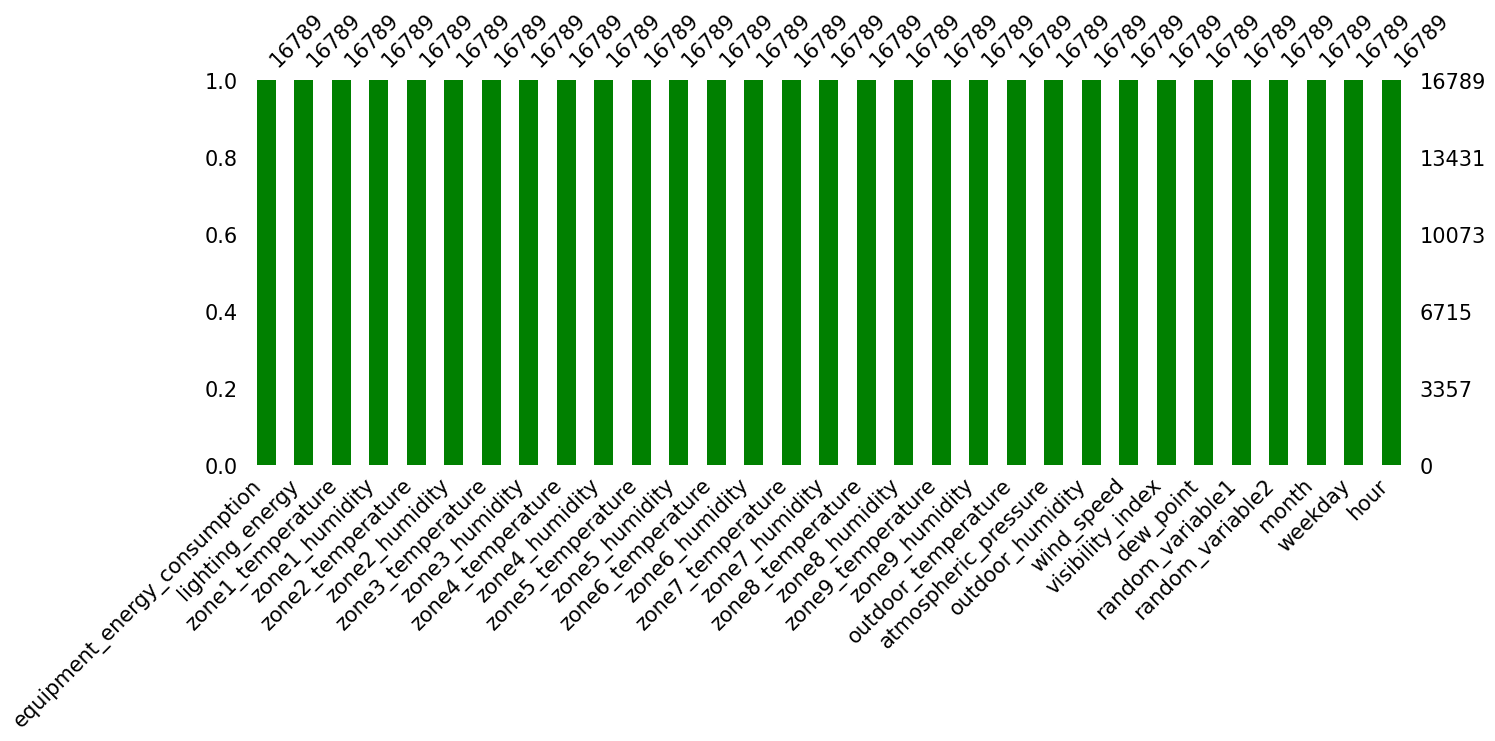

In [ ]:

msno.bar(df_energy, color='green',sort='ascending', figsize=(15,5), fontsize=15)

From the above command and figure, we noticed that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.

### What did you know about your dataset?

* The dataset provided contains 28 columns and 16789 rows and does not have any missing or duplicate values.

* There are no duplicate columns

* There are no missing & null values

## ***2. Understanding Your Variables***

In [21]:
# Dataset Columns
df_energy.columns

Index(['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature',
       'zone1_humidity', 'zone2_temperature', 'zone2_humidity',
       'zone3_temperature', 'zone3_humidity', 'zone4_temperature',
       'zone4_humidity', 'zone5_temperature', 'zone5_humidity',
       'zone6_temperature', 'zone6_humidity', 'zone7_temperature',
       'zone7_humidity', 'zone8_temperature', 'zone8_humidity',
       'zone9_temperature', 'zone9_humidity', 'outdoor_temperature',
       'atmospheric_pressure', 'outdoor_humidity', 'wind_speed',
       'visibility_index', 'dew_point', 'random_variable1', 'random_variable2',
       'month', 'weekday', 'hour'],
      dtype='object')

In [22]:
# Dataset Describe
df_energy.describe().T

count        mean         std          min  \
equipment_energy_consumption  16789.0   96.112611  180.693068 -1139.985693   
lighting_energy               16789.0    3.955149   14.463990   -86.002966   
zone1_temperature             16789.0   21.246647    2.139497     8.726818   
zone1_humidity                16789.0   39.022363    9.912643   -46.660000   
zone2_temperature             16789.0   19.791790    2.914070     2.988199   
zone2_humidity                16789.0   39.480057   10.052924   -77.265503   
zone3_temperature             16789.0   21.666545    2.578290     6.543921   
zone3_humidity                16789.0   38.200459    9.999412   -71.406273   
zone4_temperature             16789.0   20.238115    2.755579     4.613485   
zone4_humidity                16789.0   37.932562   10.699276   -81.446225   
zone5_temperature             16789.0   19.054225    2.331394     5.921094   
zone5_humidity                16789.0   50.275266   18.557061  -141.640143   
zone6_temperature             16789.0    6.471291    8.782511   -42.987365   
zone6_humidity                16789.0   59.285305   52.112396  -353.393026   
zone7_temperature             16789.0   19.669601    2.861842     3.578021   
zone7_humidity                16789.0   34.031282   11.223381   -84.882898   
zone8_temperature             16789.0   21.607205    2.940790     4.502372   
zone8_humidity                16789.0   41.832972   12.239623   -94.385668   
zone9_temperature             16789.0   18.848970    2.509453     4.476511   
zone9_humidity                16789.0   40.313473   11.044375   -81.582494   
outdoor_temperature           16789.0    6.213893    7.489459   -37.524768   
atmospheric_pressure          16789.0  755.767850   13.547727   678.159940   
outdoor_humidity              16789.0   79.017758   28.324093  -221.668765   
wind_speed                    16789.0    4.207779    4.386997   -20.929527   
visibility_index              16789.0   38.474437   21.085807   -82.329792   
dew_point                     16789.0    2.773753    6.036436   -32.098095   
random_variable1              16789.0   24.870984   25.884006  -120.170177   
random_variable2              16789.0   25.098062   25.171831  -120.409590   
month                         16789.0    2.771279    1.180053     1.000000   
weekday                       16789.0    2.978021    1.981612     0.000000   
hour                          16789.0   11.507416    6.933490     0.000000   

                                     25%         50%         75%          max  
equipment_energy_consumption   50.000000   60.000000  100.000000  1139.985693  
lighting_energy                 0.000000    0.000000    5.000000    86.002966  
zone1_temperature              20.500000   21.323333   22.100000    33.746609  
zone1_humidity                 37.000000   39.230000   42.500000    76.292756  
zone2_temperature              18.600000   19.600000   20.790000    36.552882  
zone2_humidity                 37.745000   40.300000   43.000000    77.265503  
zone3_temperature              20.533333   21.767500   22.760000    36.823982  
zone3_humidity                 36.590000   38.400000   41.400000    71.406273  
zone4_temperature              19.260000   20.290000   21.356667    35.921144  
zone4_humidity                 35.163333   38.090000   41.590000    81.446225  
zone5_temperature              18.060000   19.066667   20.100000    32.157594  
zone5_humidity                 45.290000   48.845000   53.916667   141.640143  
zone6_temperature               2.930000    6.263333    9.726667    55.932271  
zone6_humidity                 37.054000   62.730000   86.730000   353.393026  
zone7_temperature              18.500000   19.600000   21.000000    35.712952  
zone7_humidity                 30.976000   34.200000   38.127222    84.882898  
zone8_temperature              20.500000   21.790000   22.804286    38.626835  
zone8_humidity                 38.626667   42.016000   46.000000    94.385668  
zone9_temperatu

# ***3. Feature Description***

### Check Unique Values for each variable.

In [23]:
# Check Unique Values for each variable.
for i in df_energy.columns.tolist():
  print("No. of unique values in ",i,"is",df_energy[i].nunique())


No. of unique values in  equipment_energy_consumption is 225
No. of unique values in  lighting_energy is 41
No. of unique values in  zone1_temperature is 773
No. of unique values in  zone1_humidity is 2788
No. of unique values in  zone2_temperature is 1292
No. of unique values in  zone2_humidity is 2807
No. of unique values in  zone3_temperature is 1193
No. of unique values in  zone3_humidity is 2534
No. of unique values in  zone4_temperature is 1248
No. of unique values in  zone4_humidity is 3021
No. of unique values in  zone5_temperature is 1963
No. of unique values in  zone5_humidity is 6888
No. of unique values in  zone6_temperature is 3809
No. of unique values in  zone6_humidity is 9055
No. of unique values in  zone7_temperature is 1755
No. of unique values in  zone7_humidity is 5548
No. of unique values in  zone8_temperature is 2077
No. of unique values in  zone8_humidity is 6016
No. of unique values in  zone9_temperature is 699
No. of unique values in  zone9_humidity is 3015
No.

In [24]:
df_energy.head()

equipment_energy_consumption  lighting_energy  \
timestamp                                                            
2016-01-11 17:00:00                          60.0       -77.787786   
2016-01-11 17:10:00                          60.0        30.000000   
2016-01-11 17:20:00                          50.0        30.000000   
2016-01-11 17:30:00                          50.0        40.000000   
2016-01-11 17:40:00                          60.0        40.000000   

                     zone1_temperature  zone1_humidity  zone2_temperature  \
timestamp                                                                   
2016-01-11 17:00:00          33.746609       47.596667               19.2   
2016-01-11 17:10:00          19.890000       46.693333               19.2   
2016-01-11 17:20:00          19.890000       46.300000               19.2   
2016-01-11 17:30:00          33.746609       46.066667               19.2   
2016-01-11 17:40:00          19.890000       46.333333               19.2   

                     zone2_humidity  zone3_temperature  zone3_humidity  \
timestamp                                                                
2016-01-11 17:00:00       44.790000              19.79       38.201580   
2016-01-11 17:10:00       44.722500              19.79       44.790000   
2016-01-11 17:20:00       44.626667              19.79       44.933333   
2016-01-11 17:30:00       44.590000              19.79       45.000000   
2016-01-11 17:40:00       44.530000              19.79       45.000000   

                     zone4_temperature  zone4_humidity  ...  \
timestamp                                               ...   
2016-01-11 17:00:00          19.000000       45.566667  ...   
2016-01-11 17:10:00          19.000000       45.992500  ...   
2016-01-11 17:20:00          35.921144       45.890000  ...   
2016-01-11 17:30:00          27.405572       45.723333  ...   
2016-01-11 17:40:00          18.890000       45.530000  ...   

                     atmospheric_pressure  outdoor_humidity  wind_speed  \
timestamp                                                                 
2016-01-11 17:00:00                 733.5              92.0    7.000000   
2016-01-11 17:10:00                 733.6              92.0    6.666667   
2016-01-11 17:20:00                 733.7              92.0    6.333333   
2016-01-11 17:30:00                 733.8              92.0    6.000000   
2016-01-11 17:40:00                 733.9              92.0    5.666667   

                     visibility_index  dew_point  random_variable1  \
timestamp                                                            
2016-01-11 17:00:00         63.000000   5.300000         13.275433   
2016-01-11 17:10:00         59.166667   5.200000         18.606195   
2016-01-11 17:20:00         55.333333   5.100000         28.642668   
2016-01-11 17:30:00         51.500000  37.673716         45.410389   
2016-01-11 17:40:00         47.666667   4.900000         10.084097   

                     random_variable2  month  weekday  hour  
timestamp                                                    
2016-01-11 17:00:00         13.275433      1        0    17  
2016-01-11 17:10:00         18.606195      1        0    17  
2016-01-11 17:20:00         28.642668      1        0    17  
2016-01-11 17:30:00         45.410389      1        0    17  
2016-01-11 17:40:00         10.084097      1        0    17  

[5 rows x 31 columns]

### What all manipulations have you done and insights you found?

1. Splitting date columns into hour,weekdays, months.
2. It will help in analysing the data on the bases of months, days and hours.
3. Dropped date column due to no further use of them.


In [ ]:
#separate column list for better analysis

temp_cols=['zone1_temperature','zone2_temperature','zone3_temperature','zone4_temperature','zone5_temperature','zone6_temperature','zone7_temperature','zone8_temperature','zone9_temperature']
hu_cols=['zone1_humidity','zone2_humidity','zone3_humidity', 'zone4_humidity','zone5_humidity','zone6_humidity','zone7_humidity','zone8_humidity','zone9_humidity']
light_cols=['lighting_energy']
weather_cols=['outdoor_temperature','atmospheric_pressure',"outdoor_humidity","wind_speed","visibility_index","dew_point"]
date_col = ['month','weekday','hour']
random_col = ["random_variable1","random_variable2"]

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### equipment_energy_consumption Column

<Axes: xlabel='hour', ylabel='equipment_energy_consumption'>

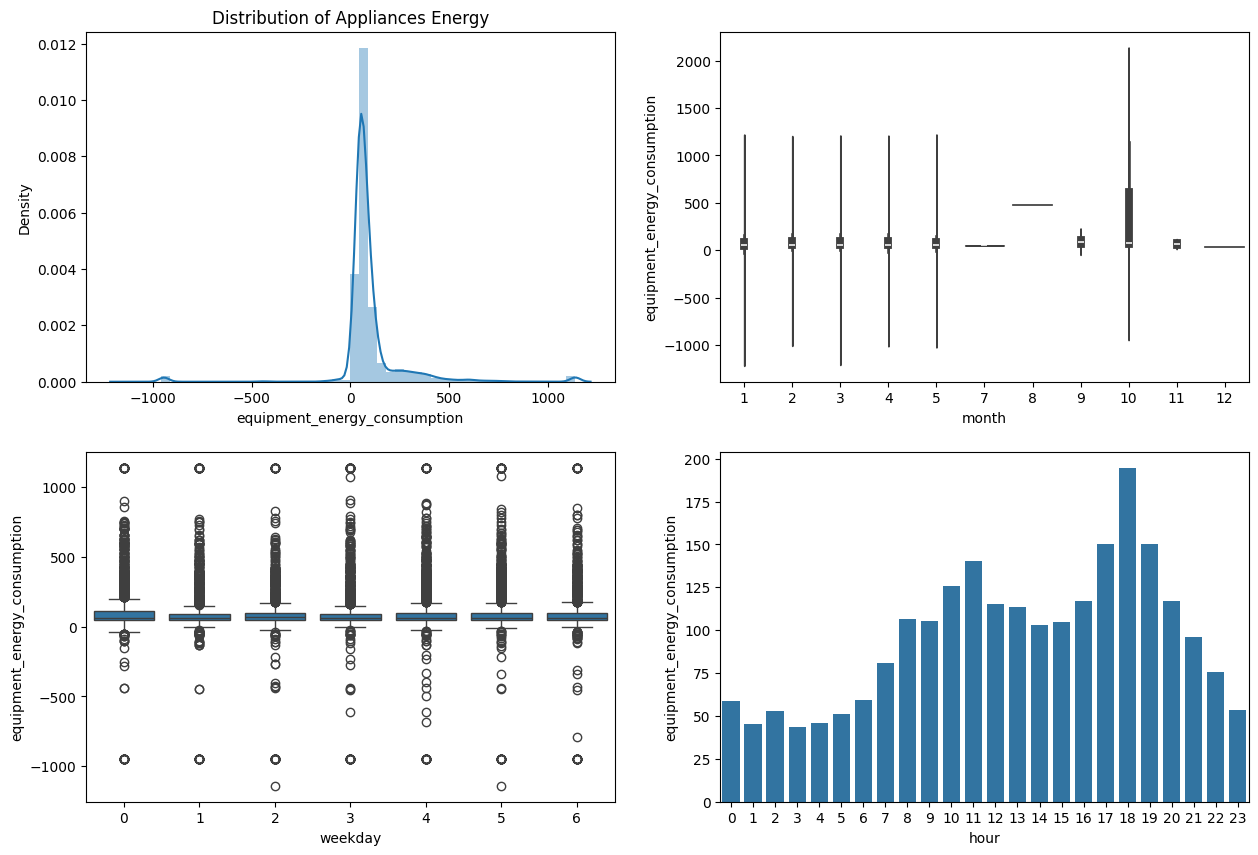

In [27]:
fig,ax=plt.subplots(2,2,figsize=(15,10))

#Distribution of Appliances
dist=sns.distplot(df_energy['equipment_energy_consumption'],ax=ax[0,0])
dist.set_title('Distribution of Appliances Energy')

#Average Appliances Energy over month
month_eng=pd.DataFrame(df_energy.groupby('month')['equipment_energy_consumption'].mean()).reset_index()
sns.violinplot(x=df_energy['month'],y=df_energy['equipment_energy_consumption'], ax=ax[0,1])

#Average Appliances Energy over weekdays
weekday_eng=pd.DataFrame(df_energy.groupby('weekday')['equipment_energy_consumption'].mean()).reset_index()
#sns.barplot(x=weekday_eng['weekday'],y=weekday_eng['Appliances'],ax=ax[1,0])
sns.boxplot(x=df_energy['weekday'],y=df_energy['equipment_energy_consumption'],ax=ax[1,0])
#Average Appliances Energy over hours
hour_eng=pd.DataFrame(df_energy.groupby('hour')['equipment_energy_consumption'].mean()).reset_index()
sns.barplot(x=hour_eng['hour'],y=hour_eng['equipment_energy_consumption'],ax=ax[1,1])

##### 1. Why did you pick the specific chart?

* The reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

*  Violin plots depict summary statistics and the density of each variable.

* Box plots are used to show distributions of numeric data values and compare them between multiple groups.

* Bar plots enables to compare categorical data in dependency of numerical data

##### 2. What is/are the insight(s) found from the chart?

* equipment_energy_consumption has positive skewness. A log transformation can make it normal. Most of the values are around 100 Wh. Outliers are also present in the column.

*  In the month of october, the energy usage is high compared to the other months, and november has low energy consumption.

* On Wednesday and Thursday , the energy usage is high compared to the other days, and Saturday has low energy consumption.

* In the hours of the day, 17 hrs to 19 hrs have high energy consumption.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the hours of the day from 0 AM. to 8 AM., we can save the most energy and send the excess power to the grid. In the weeks of Sunday,Tuesday and in months of June, july and december we can save the most money on power usage.

#### Temperature columns (Univariate+Bivariate)

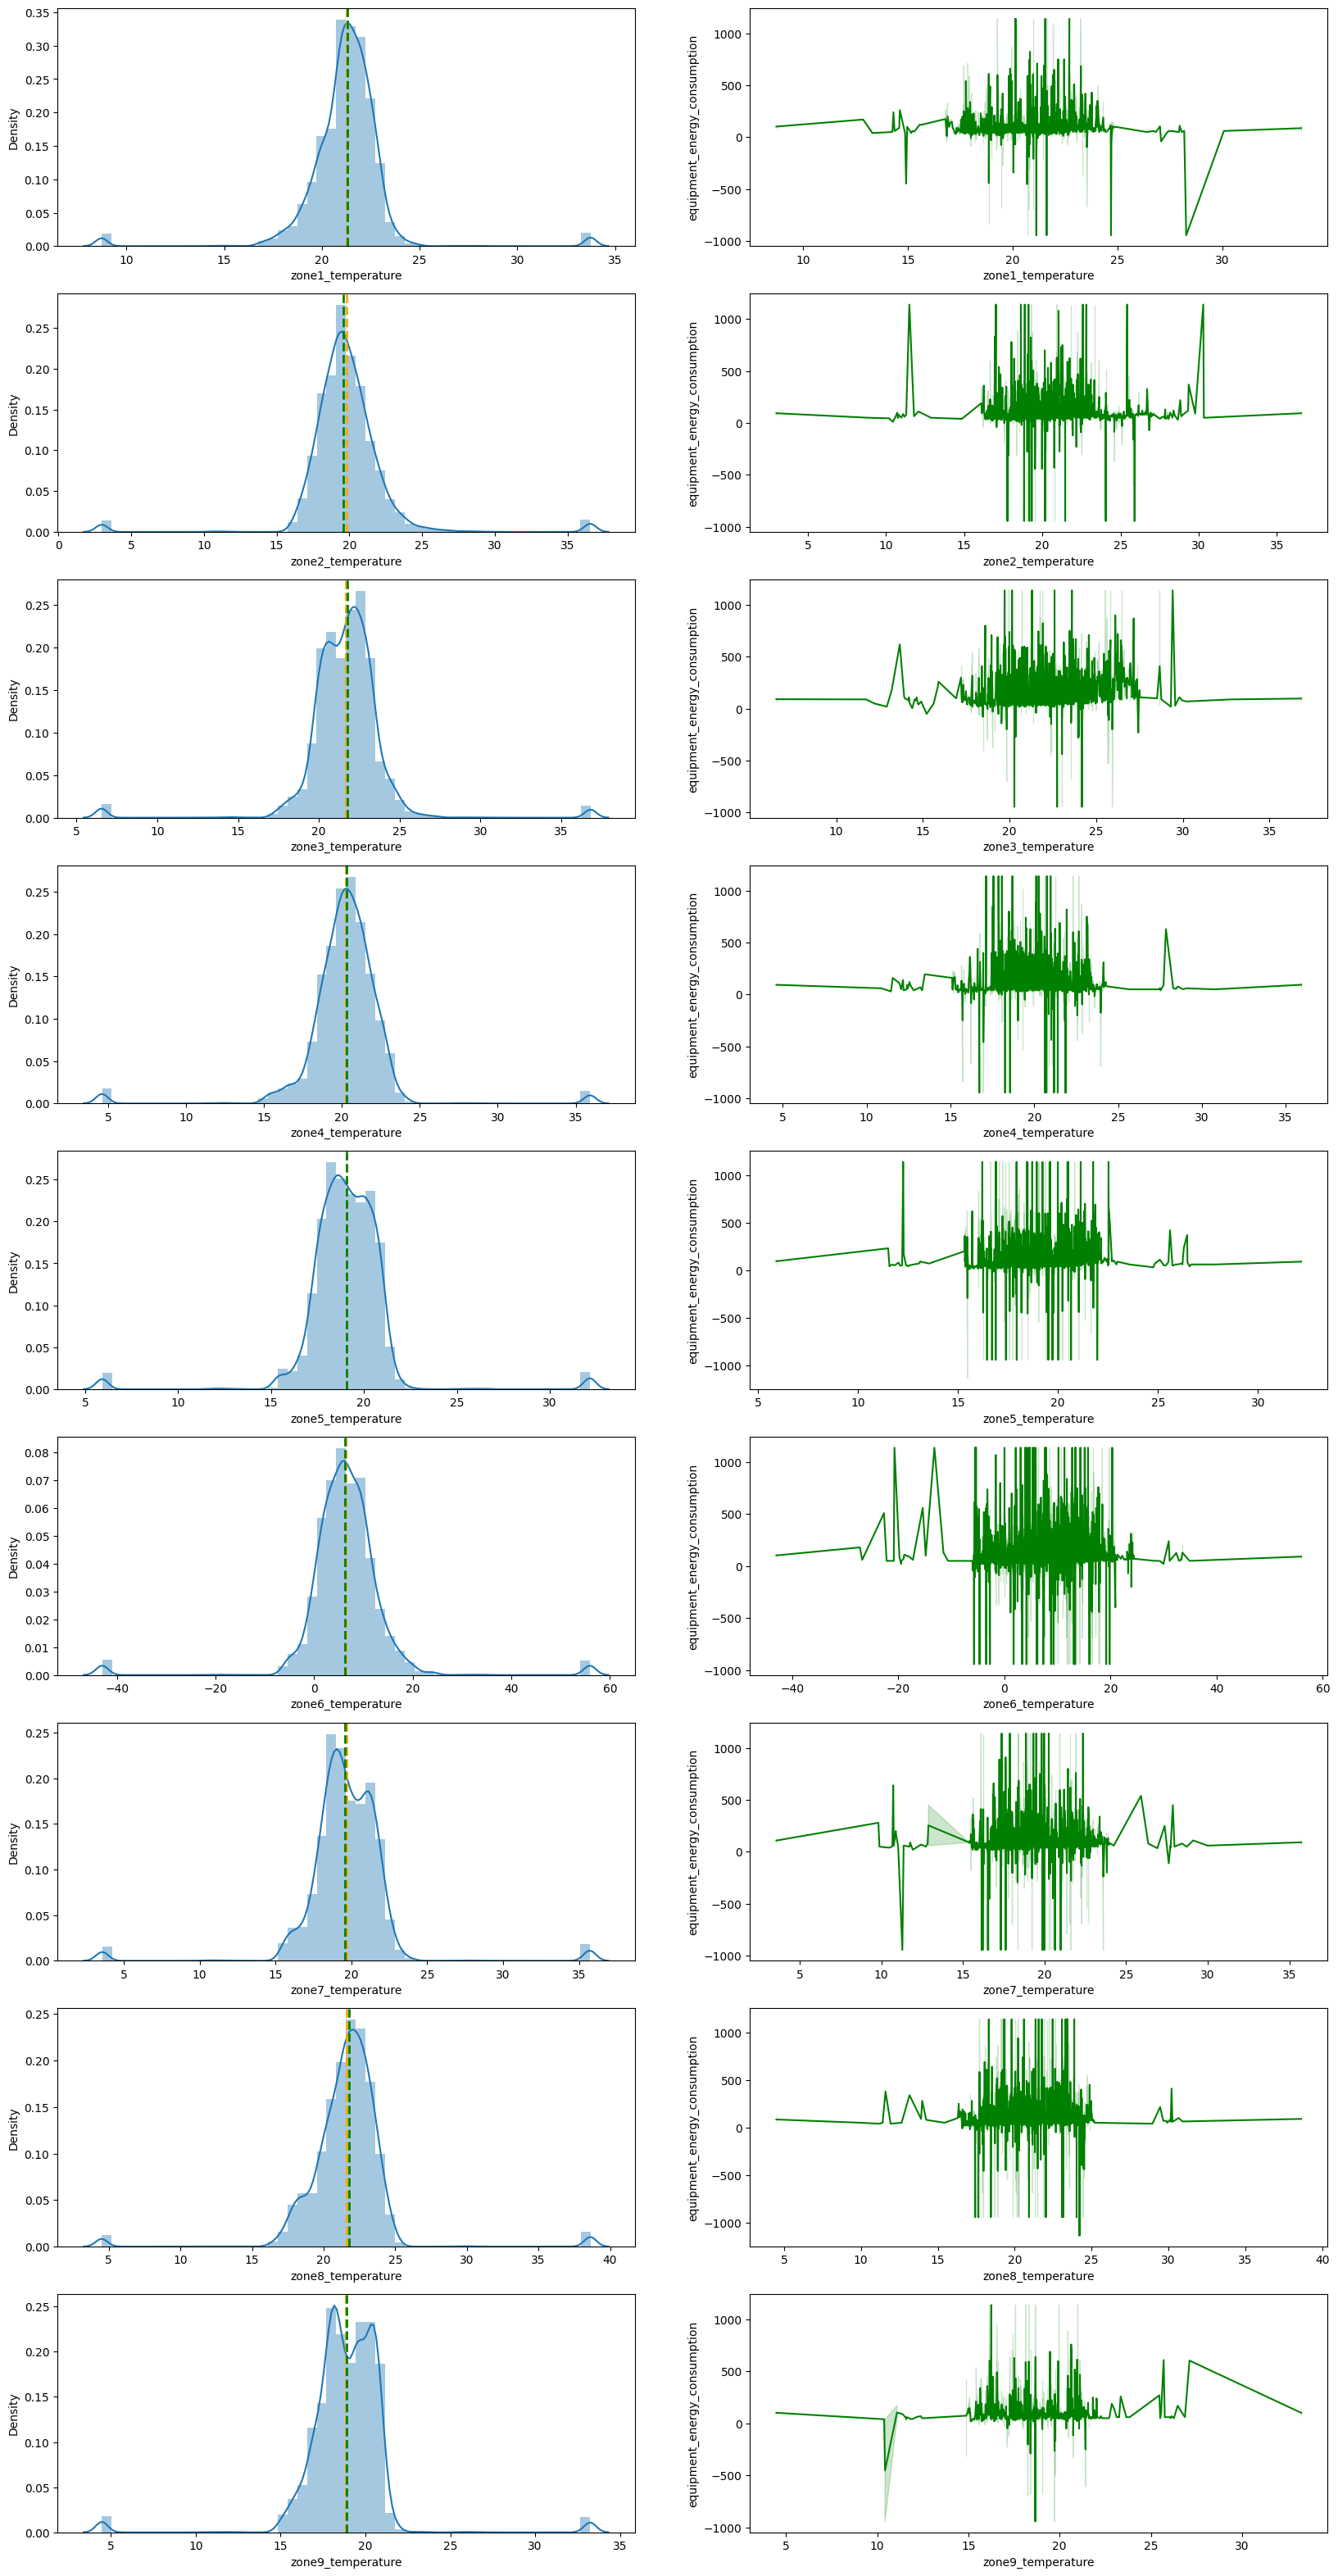

In [28]:
n=len(temp_cols)
fig,ax=plt.subplots(len(temp_cols),2,figsize=(20,40))
for i,col in enumerate(temp_cols):


  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)



  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.lineplot(data=df_energy,x=col,y='equipment_energy_consumption',color='green',ax=ax[i,1]);

##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

* A line plot is also used to observe how numerical values change over time.

##### 2. What is/are the insight(s) found from the chart?

* All Temperature columns are followed normally distribution.
* Inside buliding mean and median value of all room temperature lies between 15 to 23 degree celcius
* Outside buliding mean and median value of  zone6_temperature lies between 5 to 7 degree celcius
* The lines in nearly all of the columns follow the same pattern.
*  It could be due to the same type of relationship between temperature variables and the equipment_energy_consumption.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* When inside building temperatures are below 16 degree celcius energy consumption is minmium means maximum energy can saved.

* All temperatures have similar relationship with appliance energy consumption.It leads to multicolinarity.These columns will be dropped in upcoming appropriate section.

#### Humidity columns (Univariate+Bivariate)

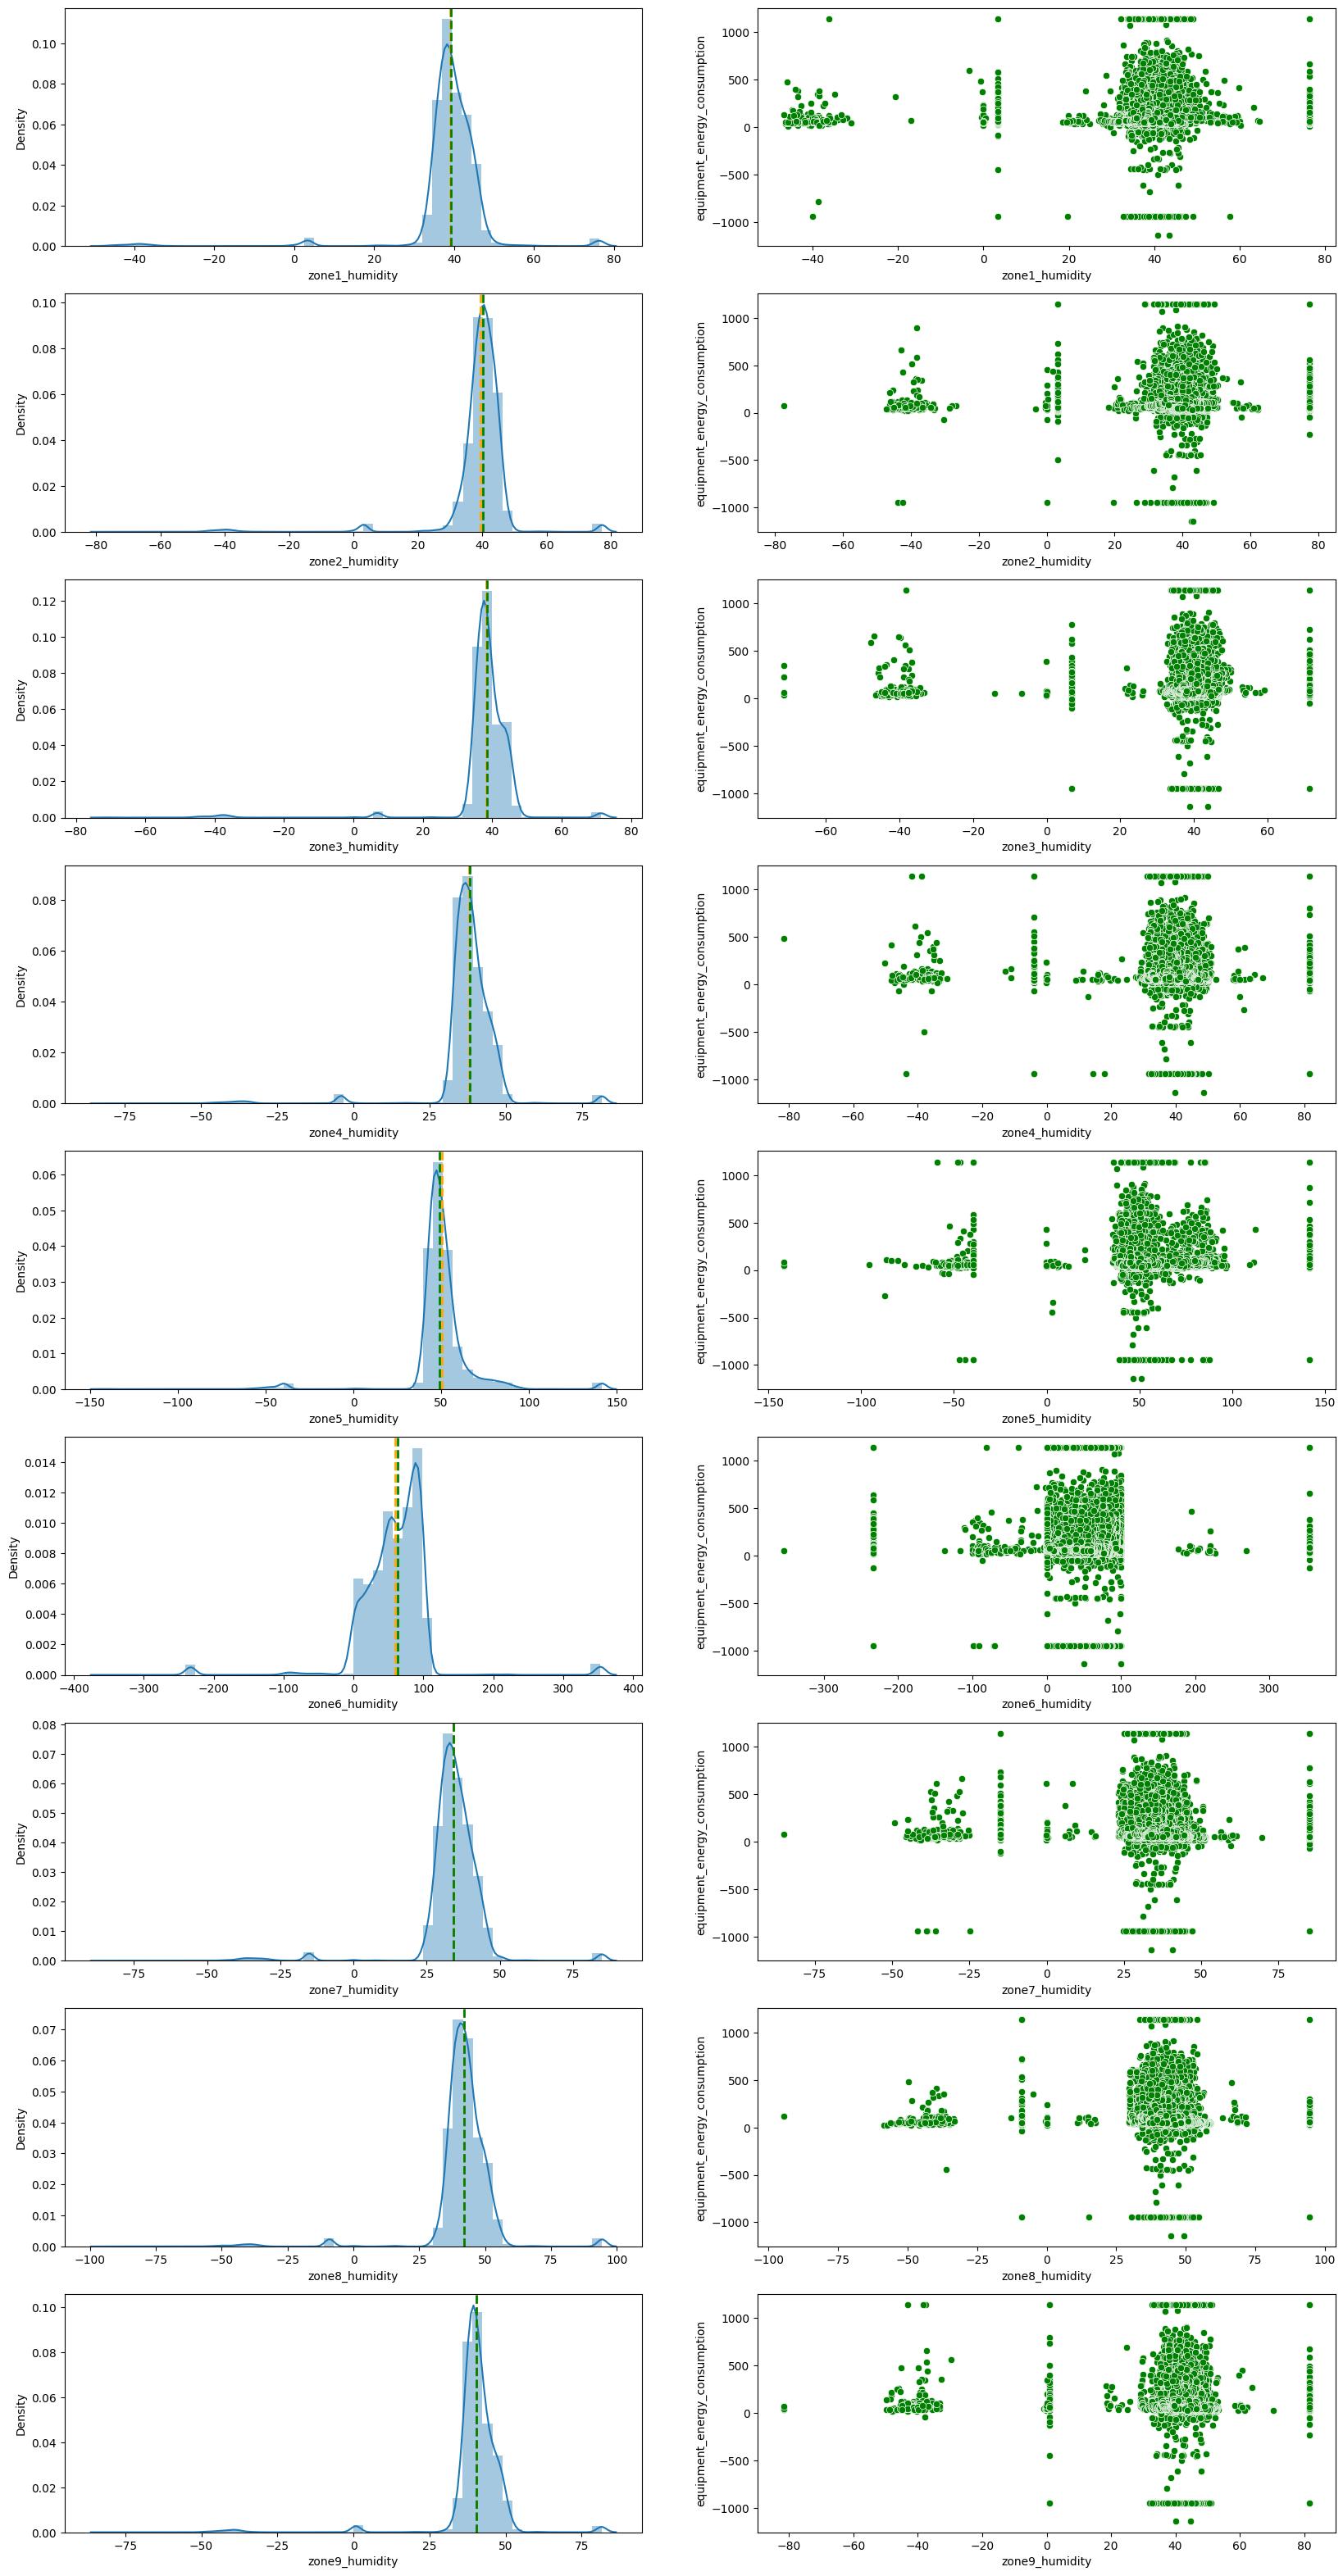

In [29]:
fig,ax=plt.subplots(len(hu_cols),2,figsize=(20,40))
for i,col in enumerate(hu_cols):



  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)



  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.scatterplot(data=df_energy,x=col,y='equipment_energy_consumption',color='green',ax=ax[i,1]);

##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

##### 2. What is/are the insight(s) found from the chart?

* All humidity distribution is follwed normal distribution.
* In inside building the mean and median value of humidity distribution lies between 35 to 50 percent,except zone5_humidity and it is near about 60 percent.
* For zone5_humidity , the mean and median value is around 55 percent.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* low humidity and high humidity can saves maximum energy.
* All humidities have similar relationship with equipment_energy_consumption. It leads to multicolinarity.These columns will be dropped in upcoming appropriate section.

#### Weather columns (Univariate+Bivariate)

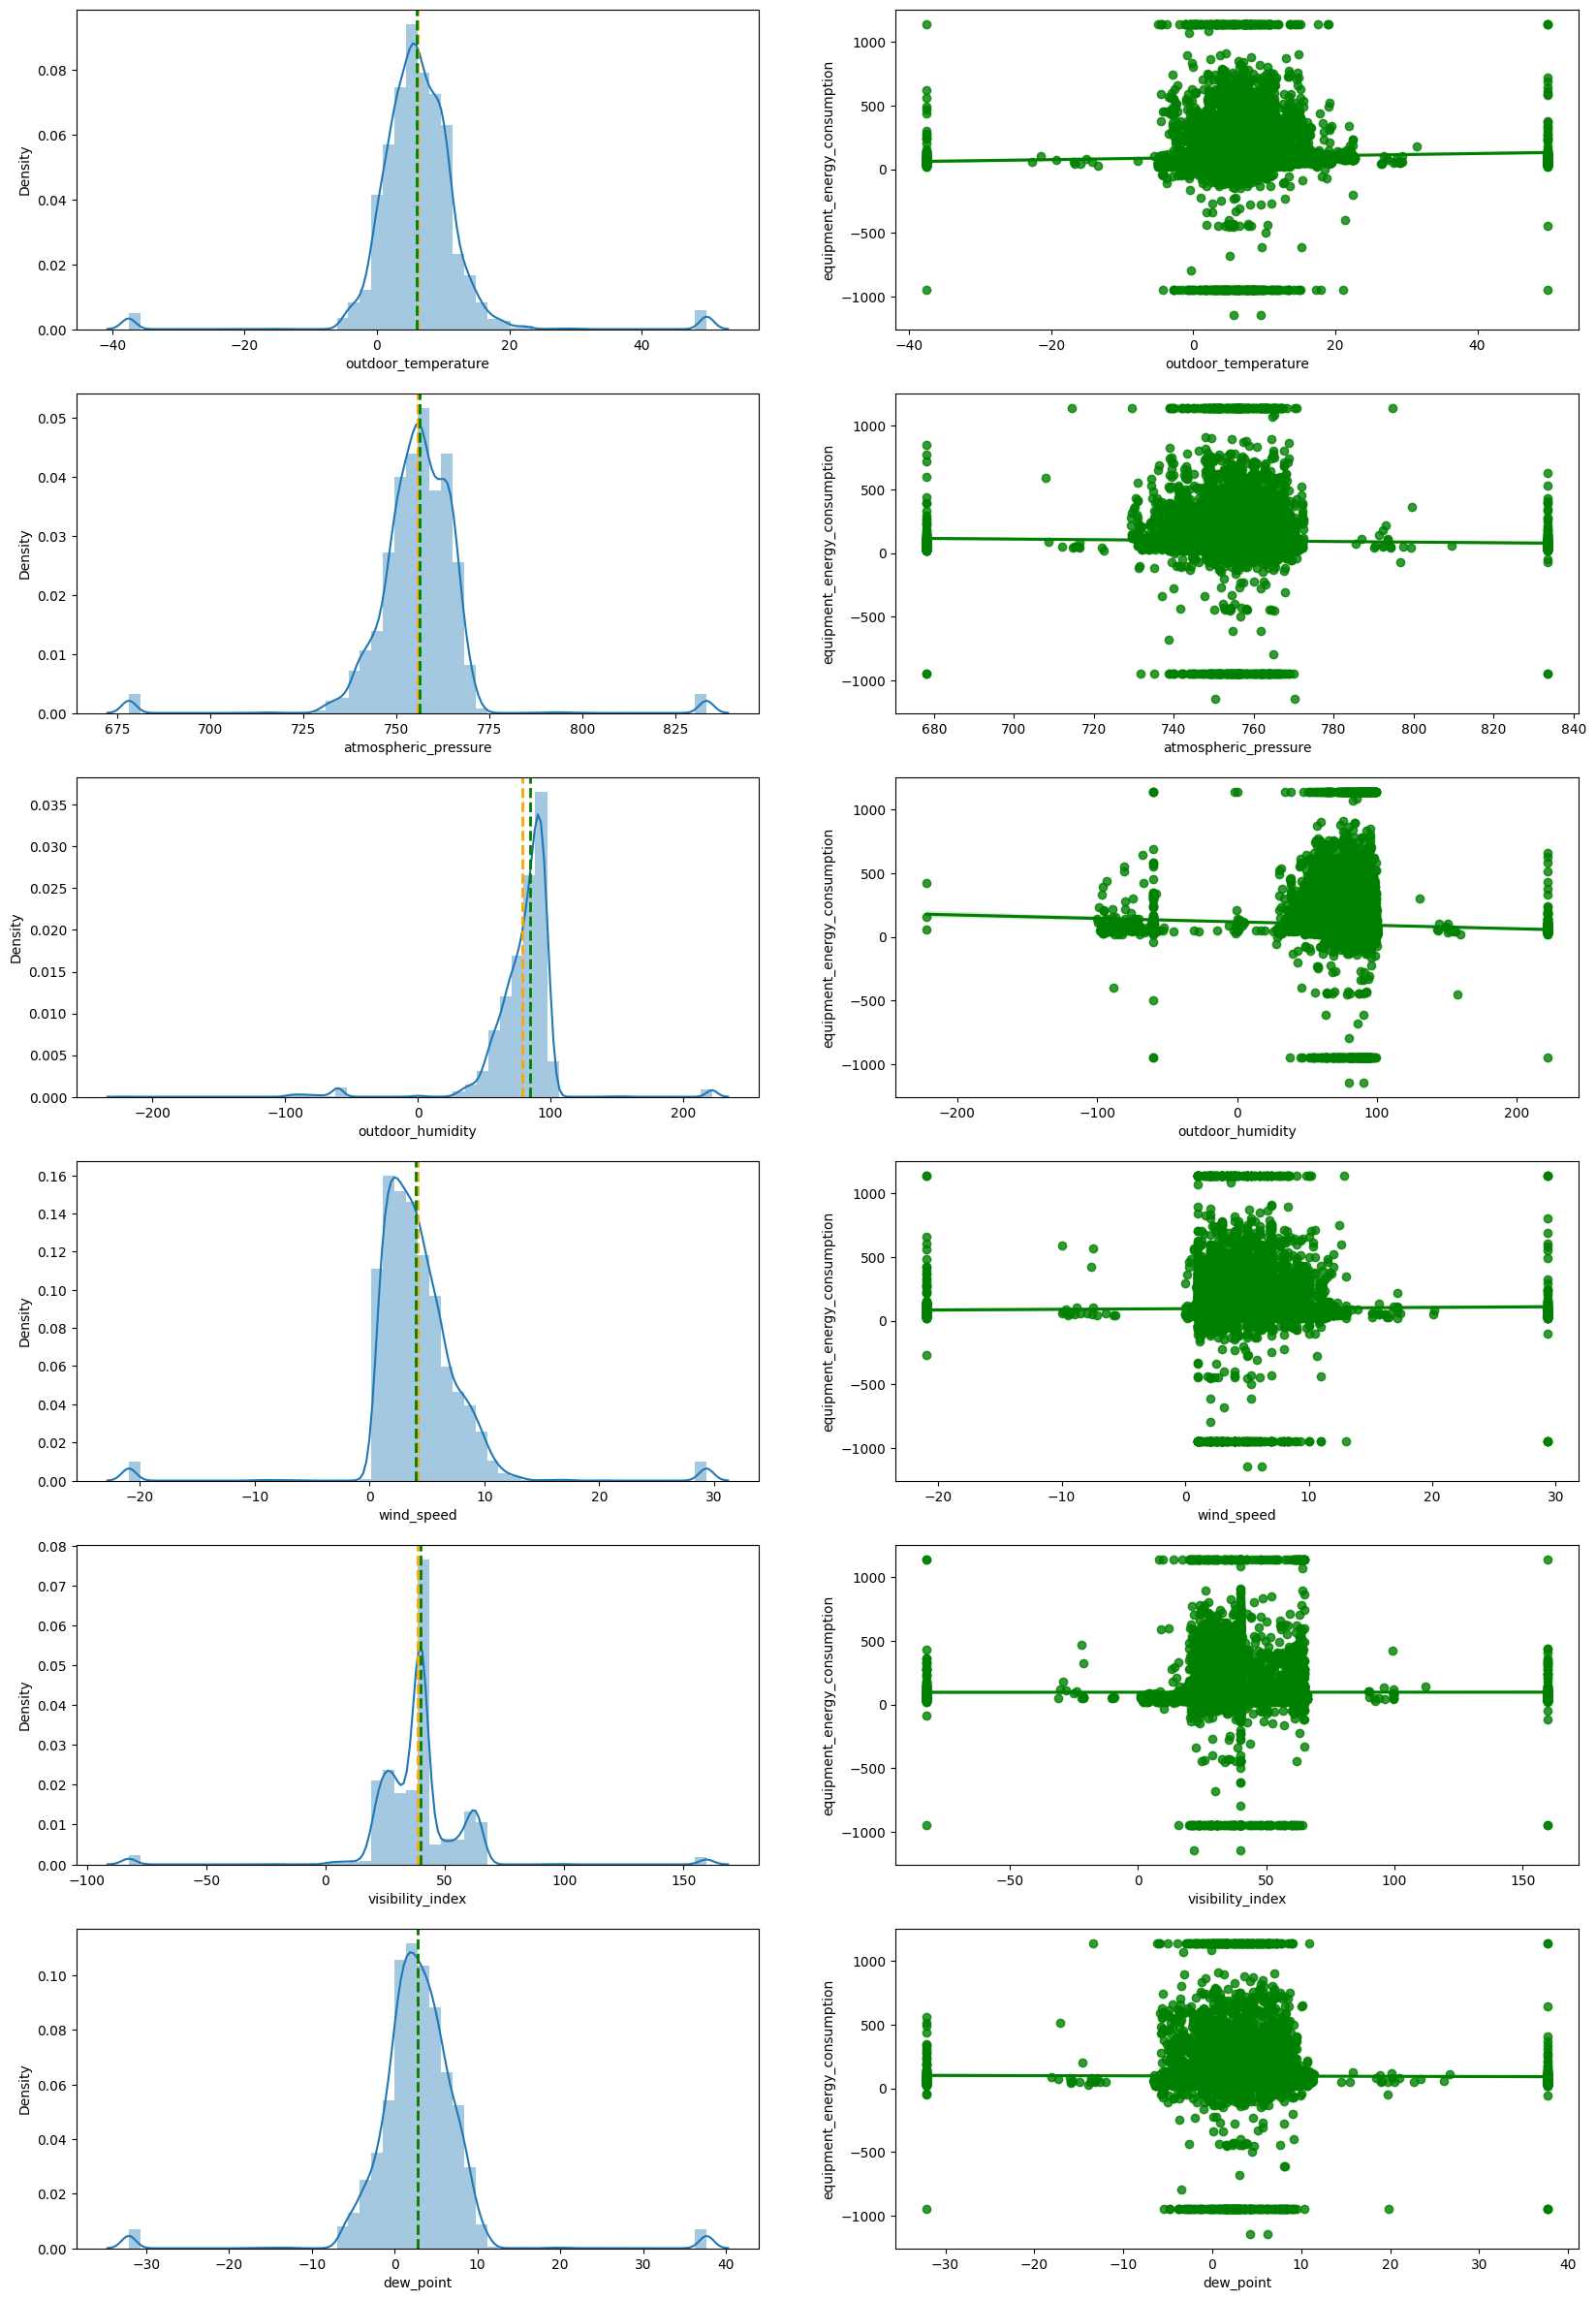

In [30]:
fig,ax=plt.subplots(len(weather_cols),2,figsize=(20,30))
for i,col in enumerate(weather_cols):
  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.regplot(data=df_energy,x=col,y='equipment_energy_consumption',color='green',ax=ax[i,1]);

##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* Regplot method is used to plot data and a linear regression model fit. we can observe if the feature  can fit with regression problem.

##### 2. What is/are the insight(s) found from the chart?

* Teperature outside, Presuure,Tdewpoint have followed normal distribution.
* Windspeed is positively skewd
* windspeed, outdoor_humidity are right and left skewd respectively.

#### Light Column (Univariate+ Bivariate)

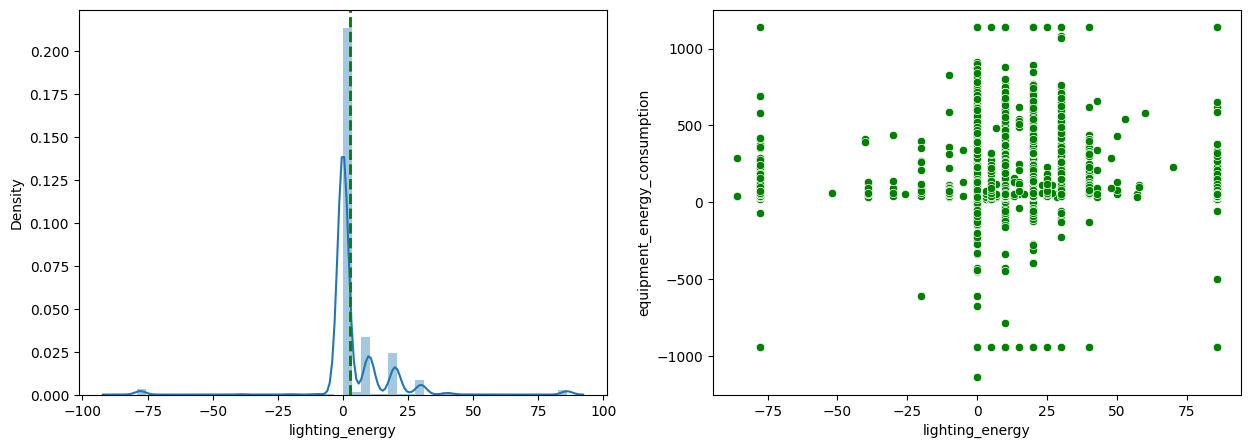

In [31]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

  #univariate of the columns
dist=sns.distplot(df_energy['lighting_energy'],ax=ax[0])
ax[0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)


#Bivariate Analysis the Appliance Energy #lineplot
scatter=sns.scatterplot(data=df_energy,x='lighting_energy',y='equipment_energy_consumption',color='green',ax=ax[1]);

##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

##### 2. What is/are the insight(s) found from the chart?

This column  follows the right skewness.this column isn't adding many values to the dataset, we'll remove it in the upcoming step.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It has no impact on the buisness.

Random variable Column (Univariate+ Bivariate)

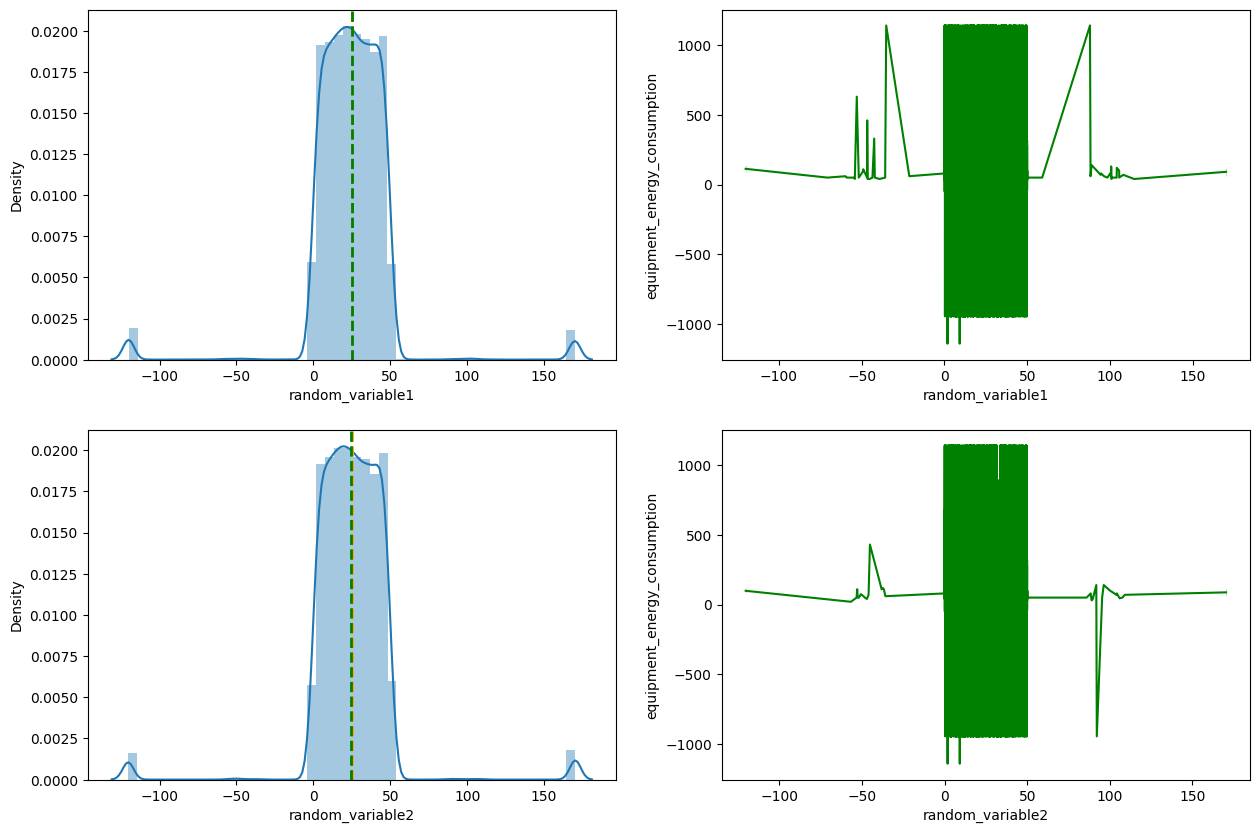

In [32]:
fig,ax=plt.subplots(len(random_col),2,figsize=(15,10))
for i,col in enumerate(random_col):
  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)


  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.lineplot(data=df_energy,x=col,y='equipment_energy_consumption',color='green',ax=ax[i,1]);

##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.


* A line plot is also used to observe how numerical values change over time.

##### 2. What is/are the insight(s) found from the chart?

* distribution of random variables are symmetric
* two random variable has same distribution and similar relationship with equipment_energy_consumption.It leads to multicolinearity and one should must be dropped in upcoming steps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It has no impact on buisness.

#### Temperature vs Humidity

In [33]:
# create list of temperature and humidity
temperature_col=temp_cols.copy()
temperature_col.append('outdoor_temperature')


humidity_col=hu_cols.copy()
humidity_col.append('outdoor_humidity')


# zip the list
temp_hum=list(zip(temperature_col,humidity_col))

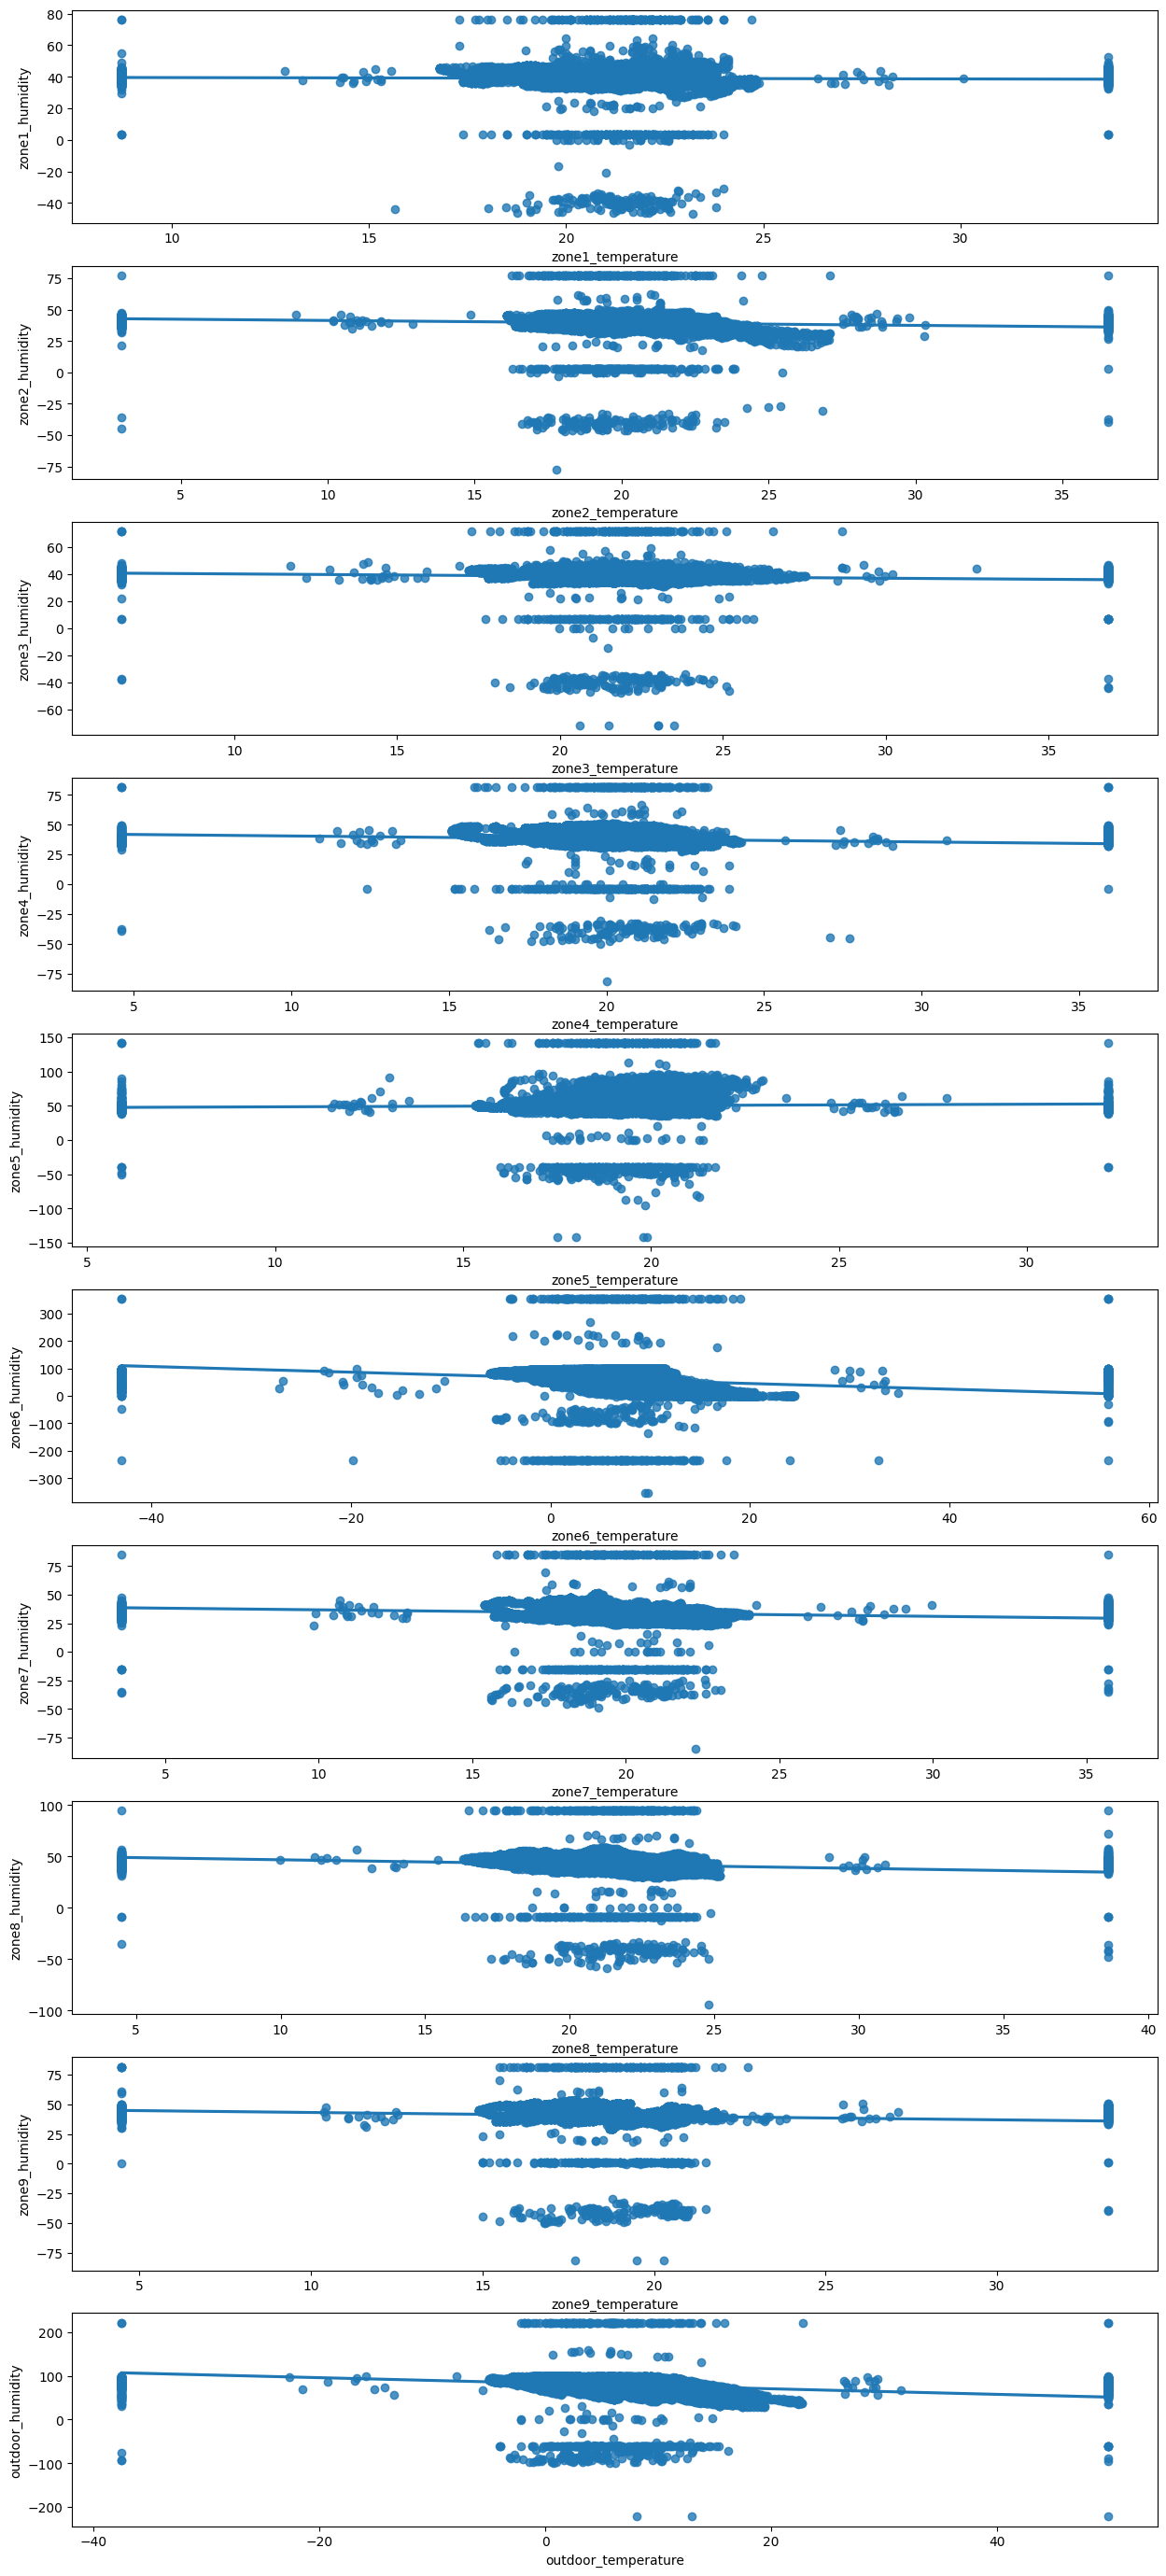

In [34]:
#plot temperature humidity relationship
fig,ax=plt.subplots(len(temp_hum),1,figsize=(15,35))
for i,cols in enumerate(temp_hum):
  sns.regplot(x=df_energy[cols[0]],y=df_energy[cols[1]],ax=ax[i])

##### 1. Why did you pick the specific chart?

Regplot method is used to plot data and a linear regression model fit. we can observe if the feature can fit with regression problem.

##### 2. What is/are the insight(s) found from the chart?

*  outdoor_temperature and outdoor_humidity, zone6_temperature and zone6_humidity has strong negative linear relationship.
* Others temperature humidity relationship has  positive and mild negative linear relationship.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These relationships might be leads to multicoliearity.

#### Chart - 14 - Correlation Heatmap

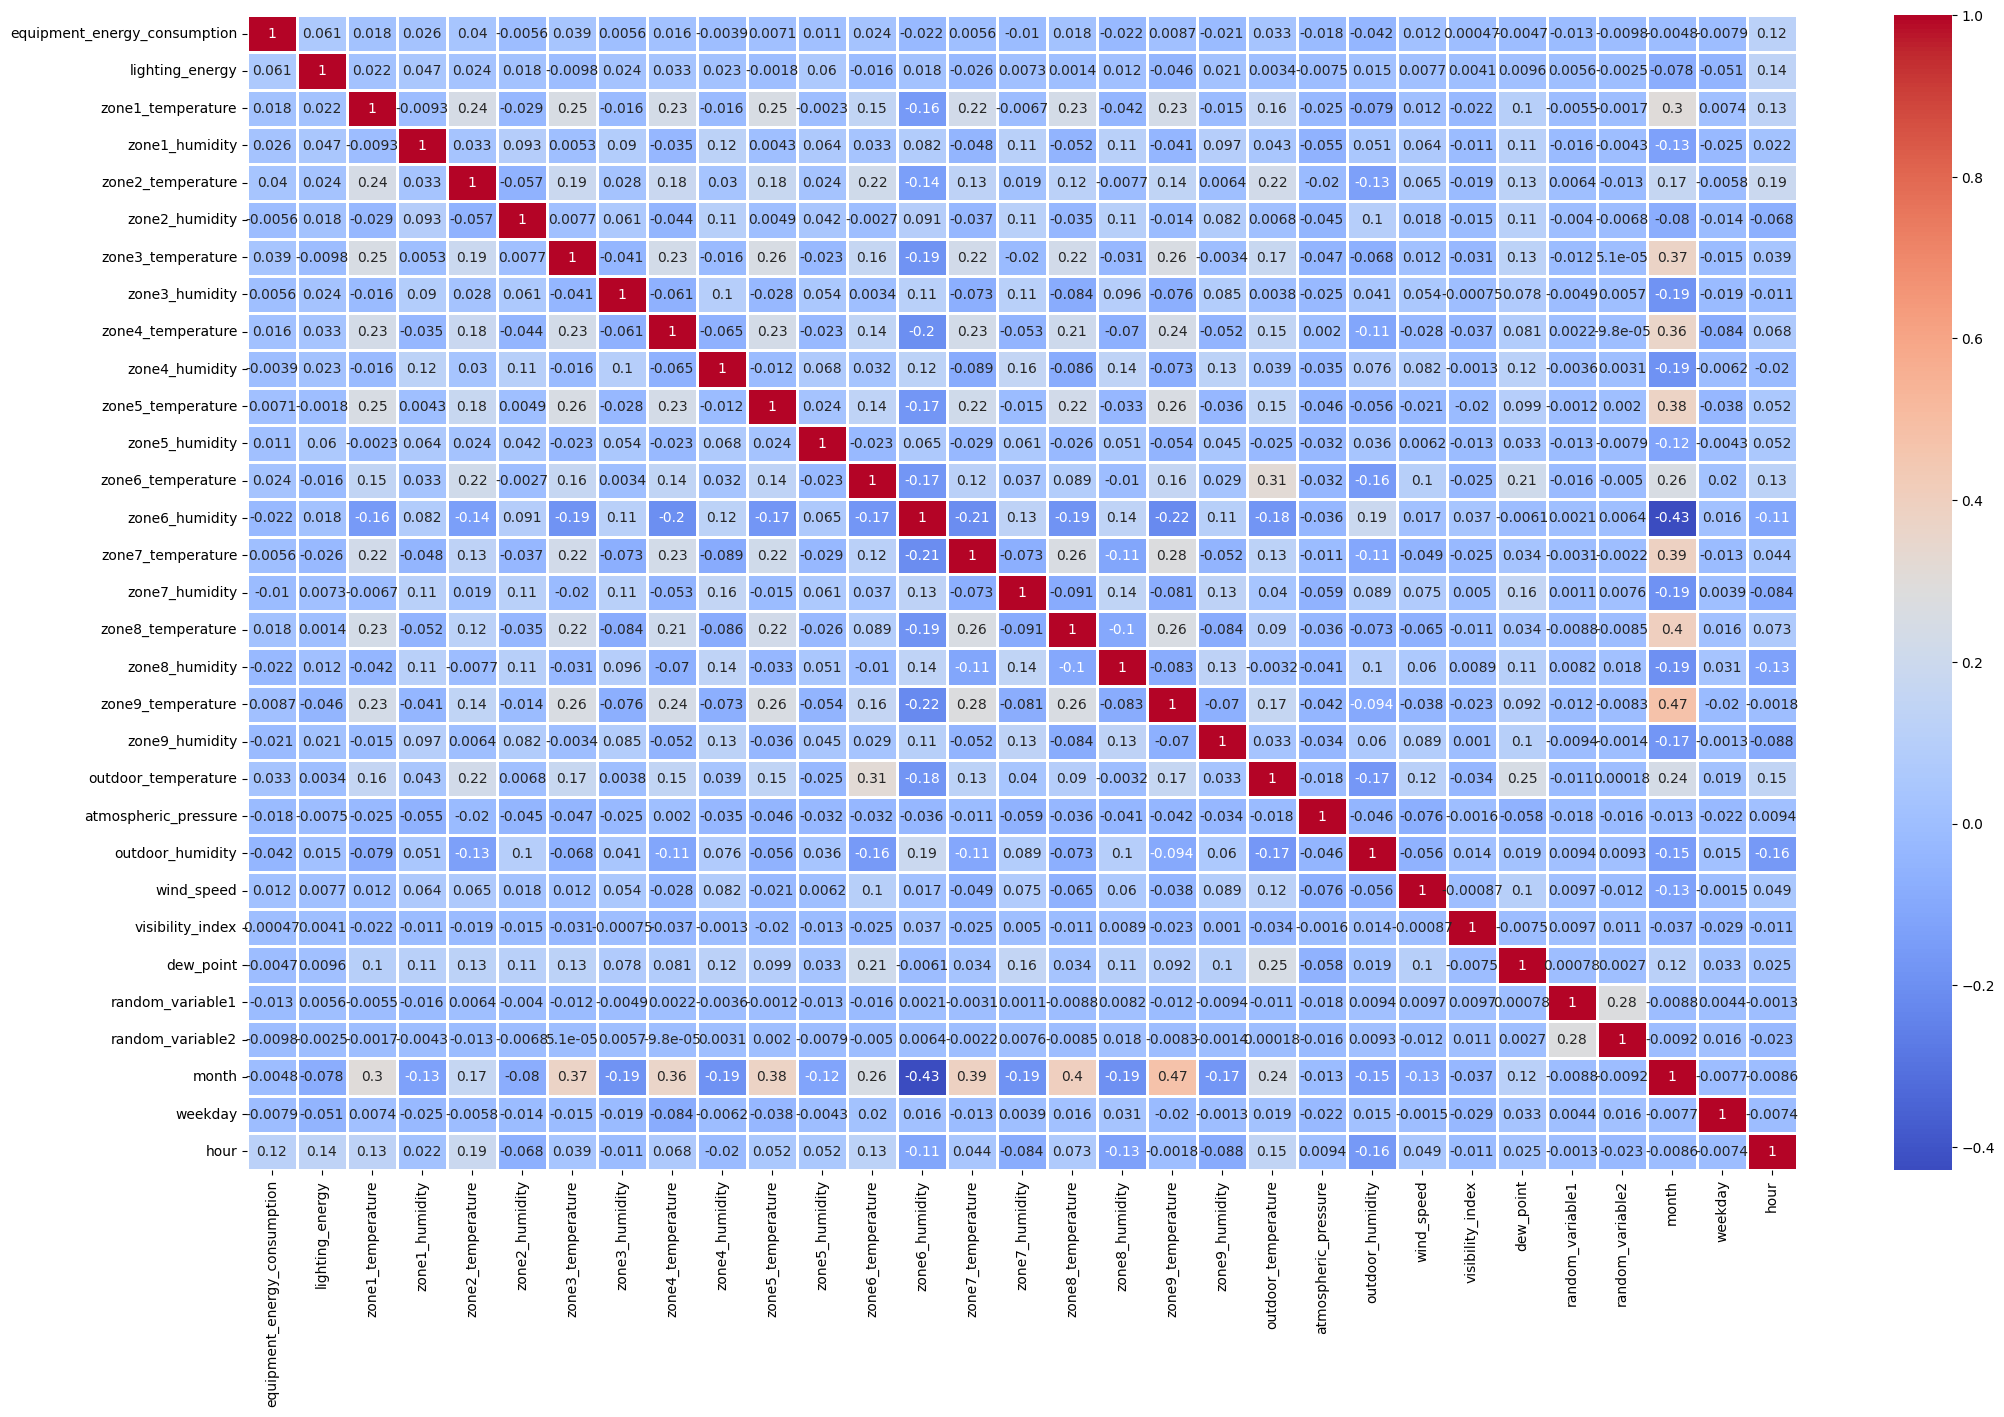

In [35]:
# Correlation Heatmap visualization code
plt.figure(figsize=(25,15))
correlation = df_energy.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm',linewidth=0.8)
plt.show()

##### 1. Why did you pick the specific chart?

The main reasons for using the heat map are:

* Heatmaps provide a quick overview of critical web performance factors.

* Heatmaps are a visual way to understand numerical features.

* Heatmaps assist businesses in making informed decisions that benefit the bottom line.

* It also aids in comprehending multicollinearity, which allows us to determine which features to keep and which to eliminate or combine.


##### 2. What is/are the insight(s) found from the chart?

* Temprature columns : It is clear from the heatmap that all tempreture columns have a high degree of correlation with other tempreture columns.
* Humidity columns : For each and every humidity columns, we see moderate correlation which is workable.
* Weather_columns: Visibility, Tdewpoint, Press_mm_hg have low correlation values.
* Random variables column : low correlation values

#### Chart - 15 - Pair Plot of Temperature Columns

<Figure size 2500x2500 with 0 Axes>

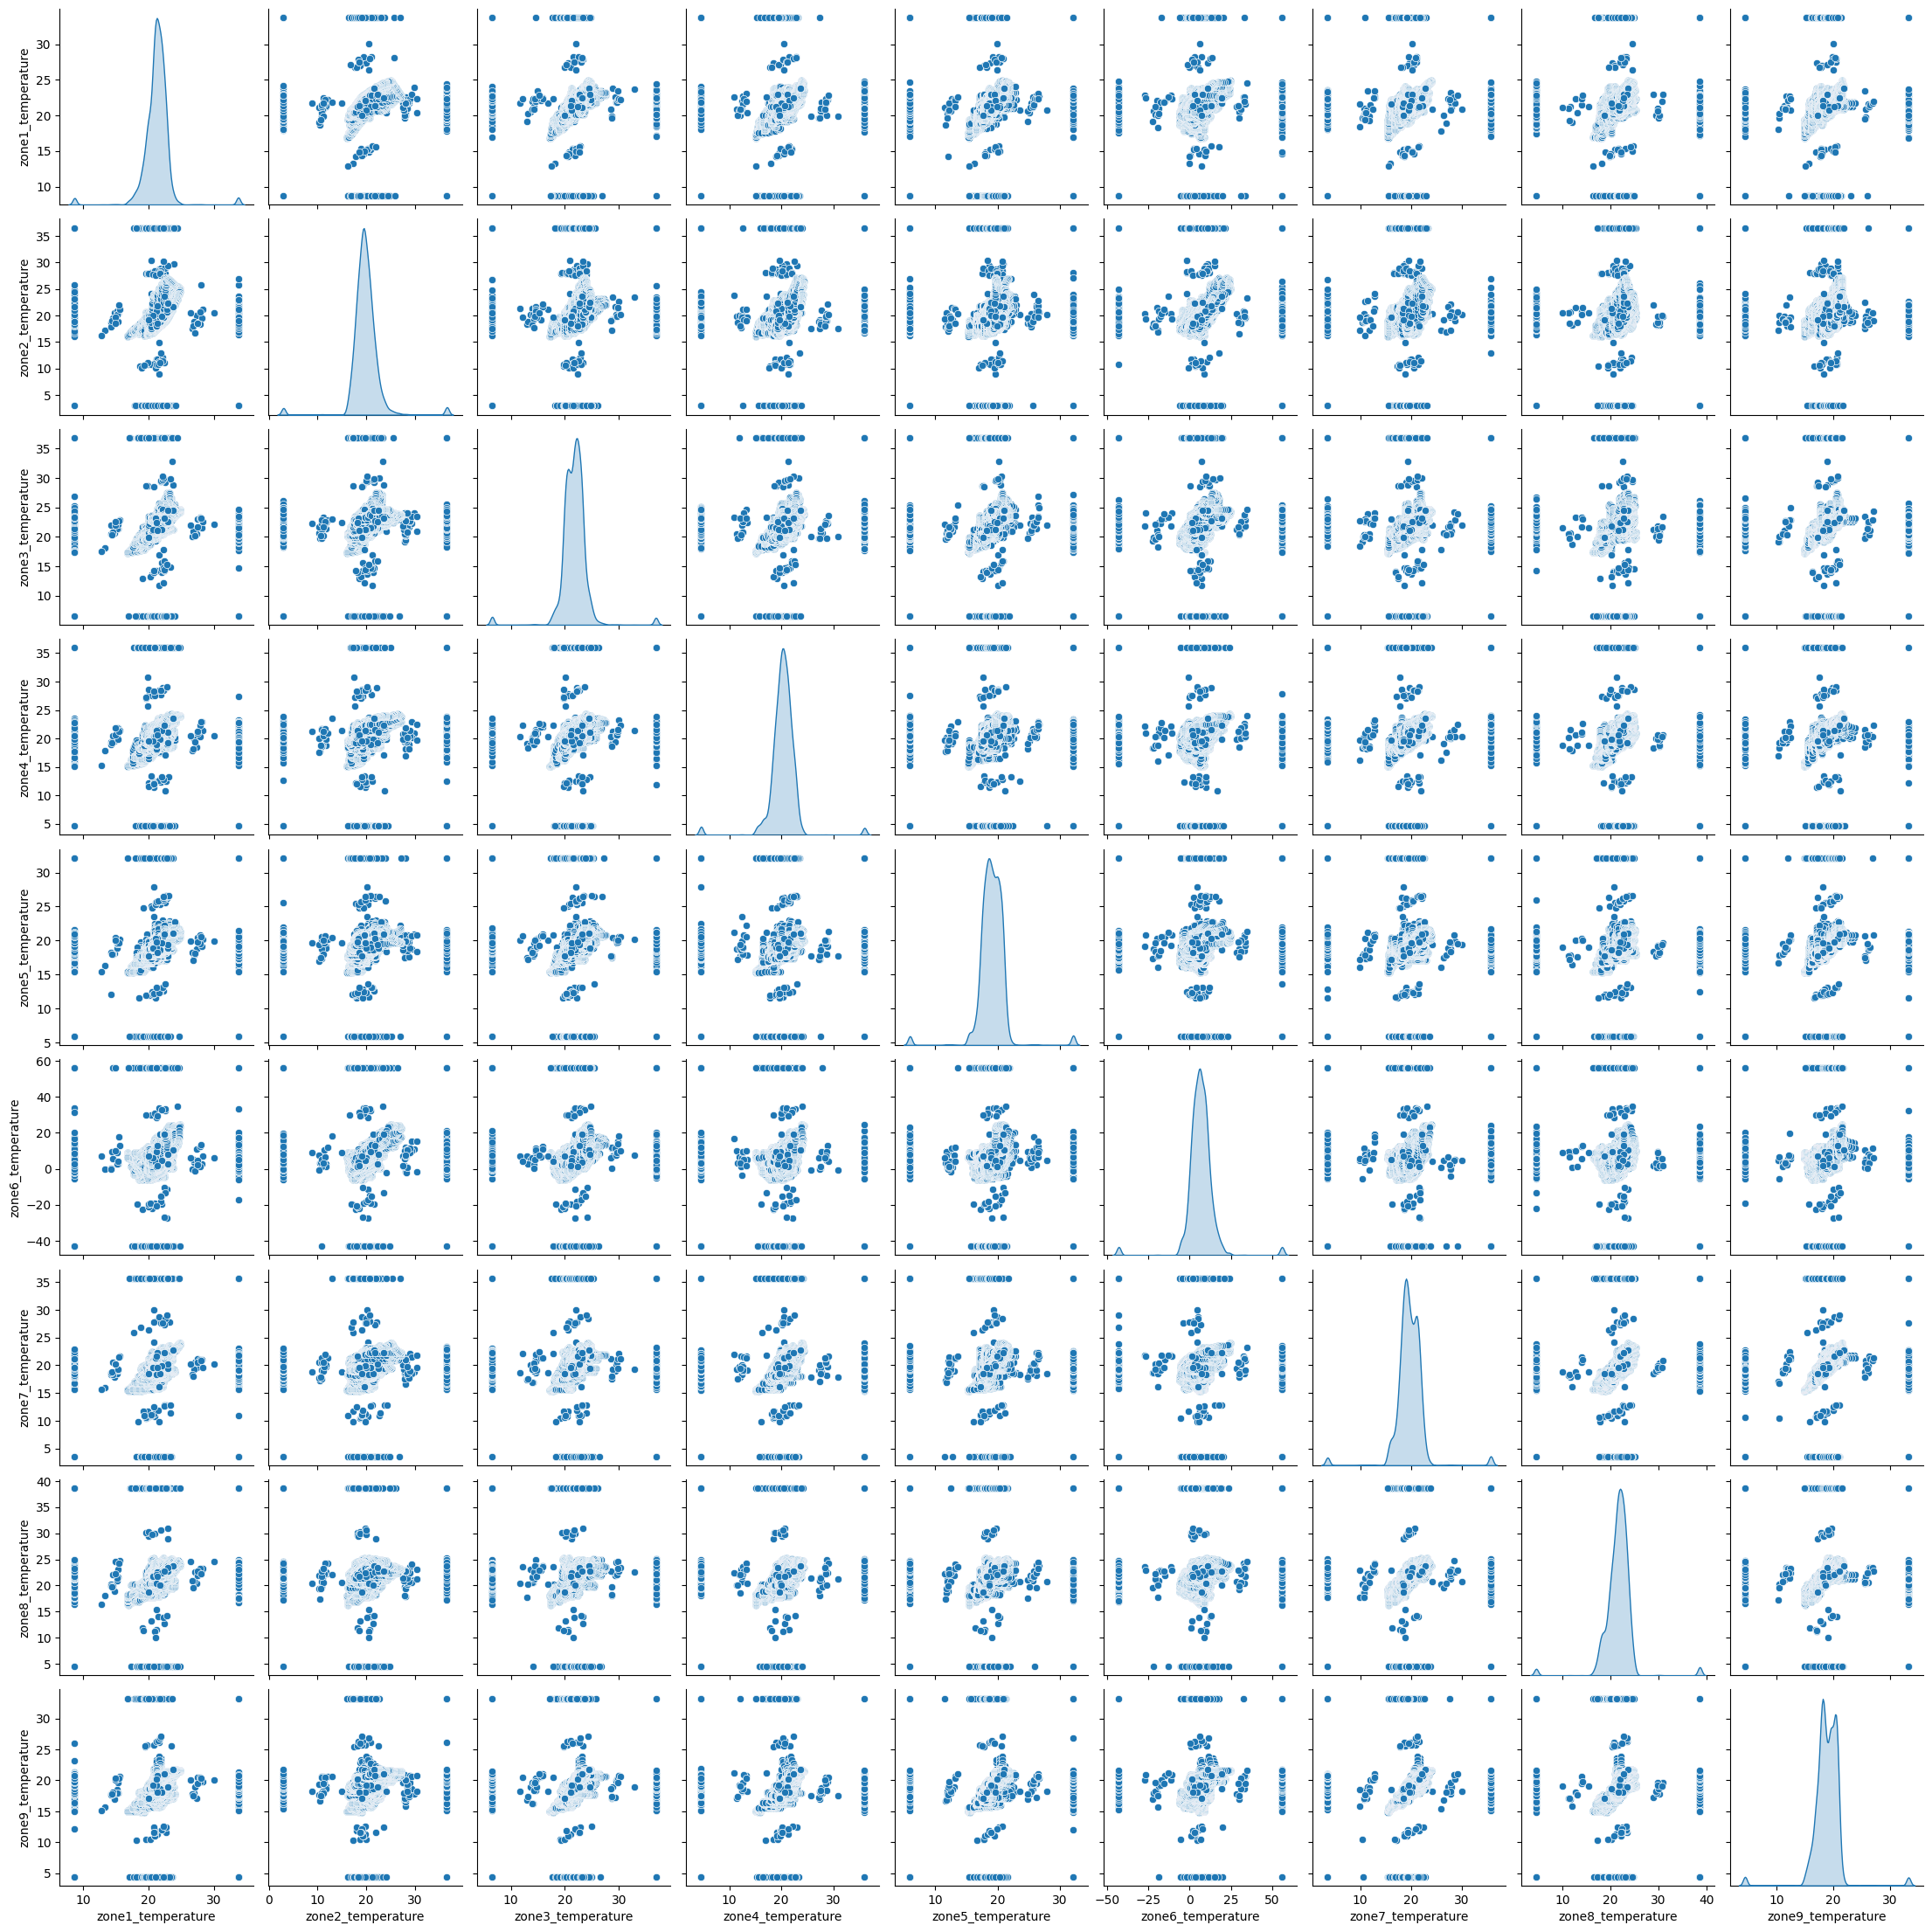

In [36]:
# Pair Plot visualization code
plt.figure(figsize=(25,25))
pair=sns.pairplot(df_energy[temp_cols], diag_kind='kde')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is a data visualisation that plots pair-wise relationships between all the variables in a dataset. This helps to better understand the relationships visually.

#####  What is/are the insight(s) found from the chart?


* Tempreture columns may be lead to multicolinearity.It will be treated upcoming steps.

#### Chart - 15 - Pair Plot of Humidity Columns

<Figure size 2500x2500 with 0 Axes>

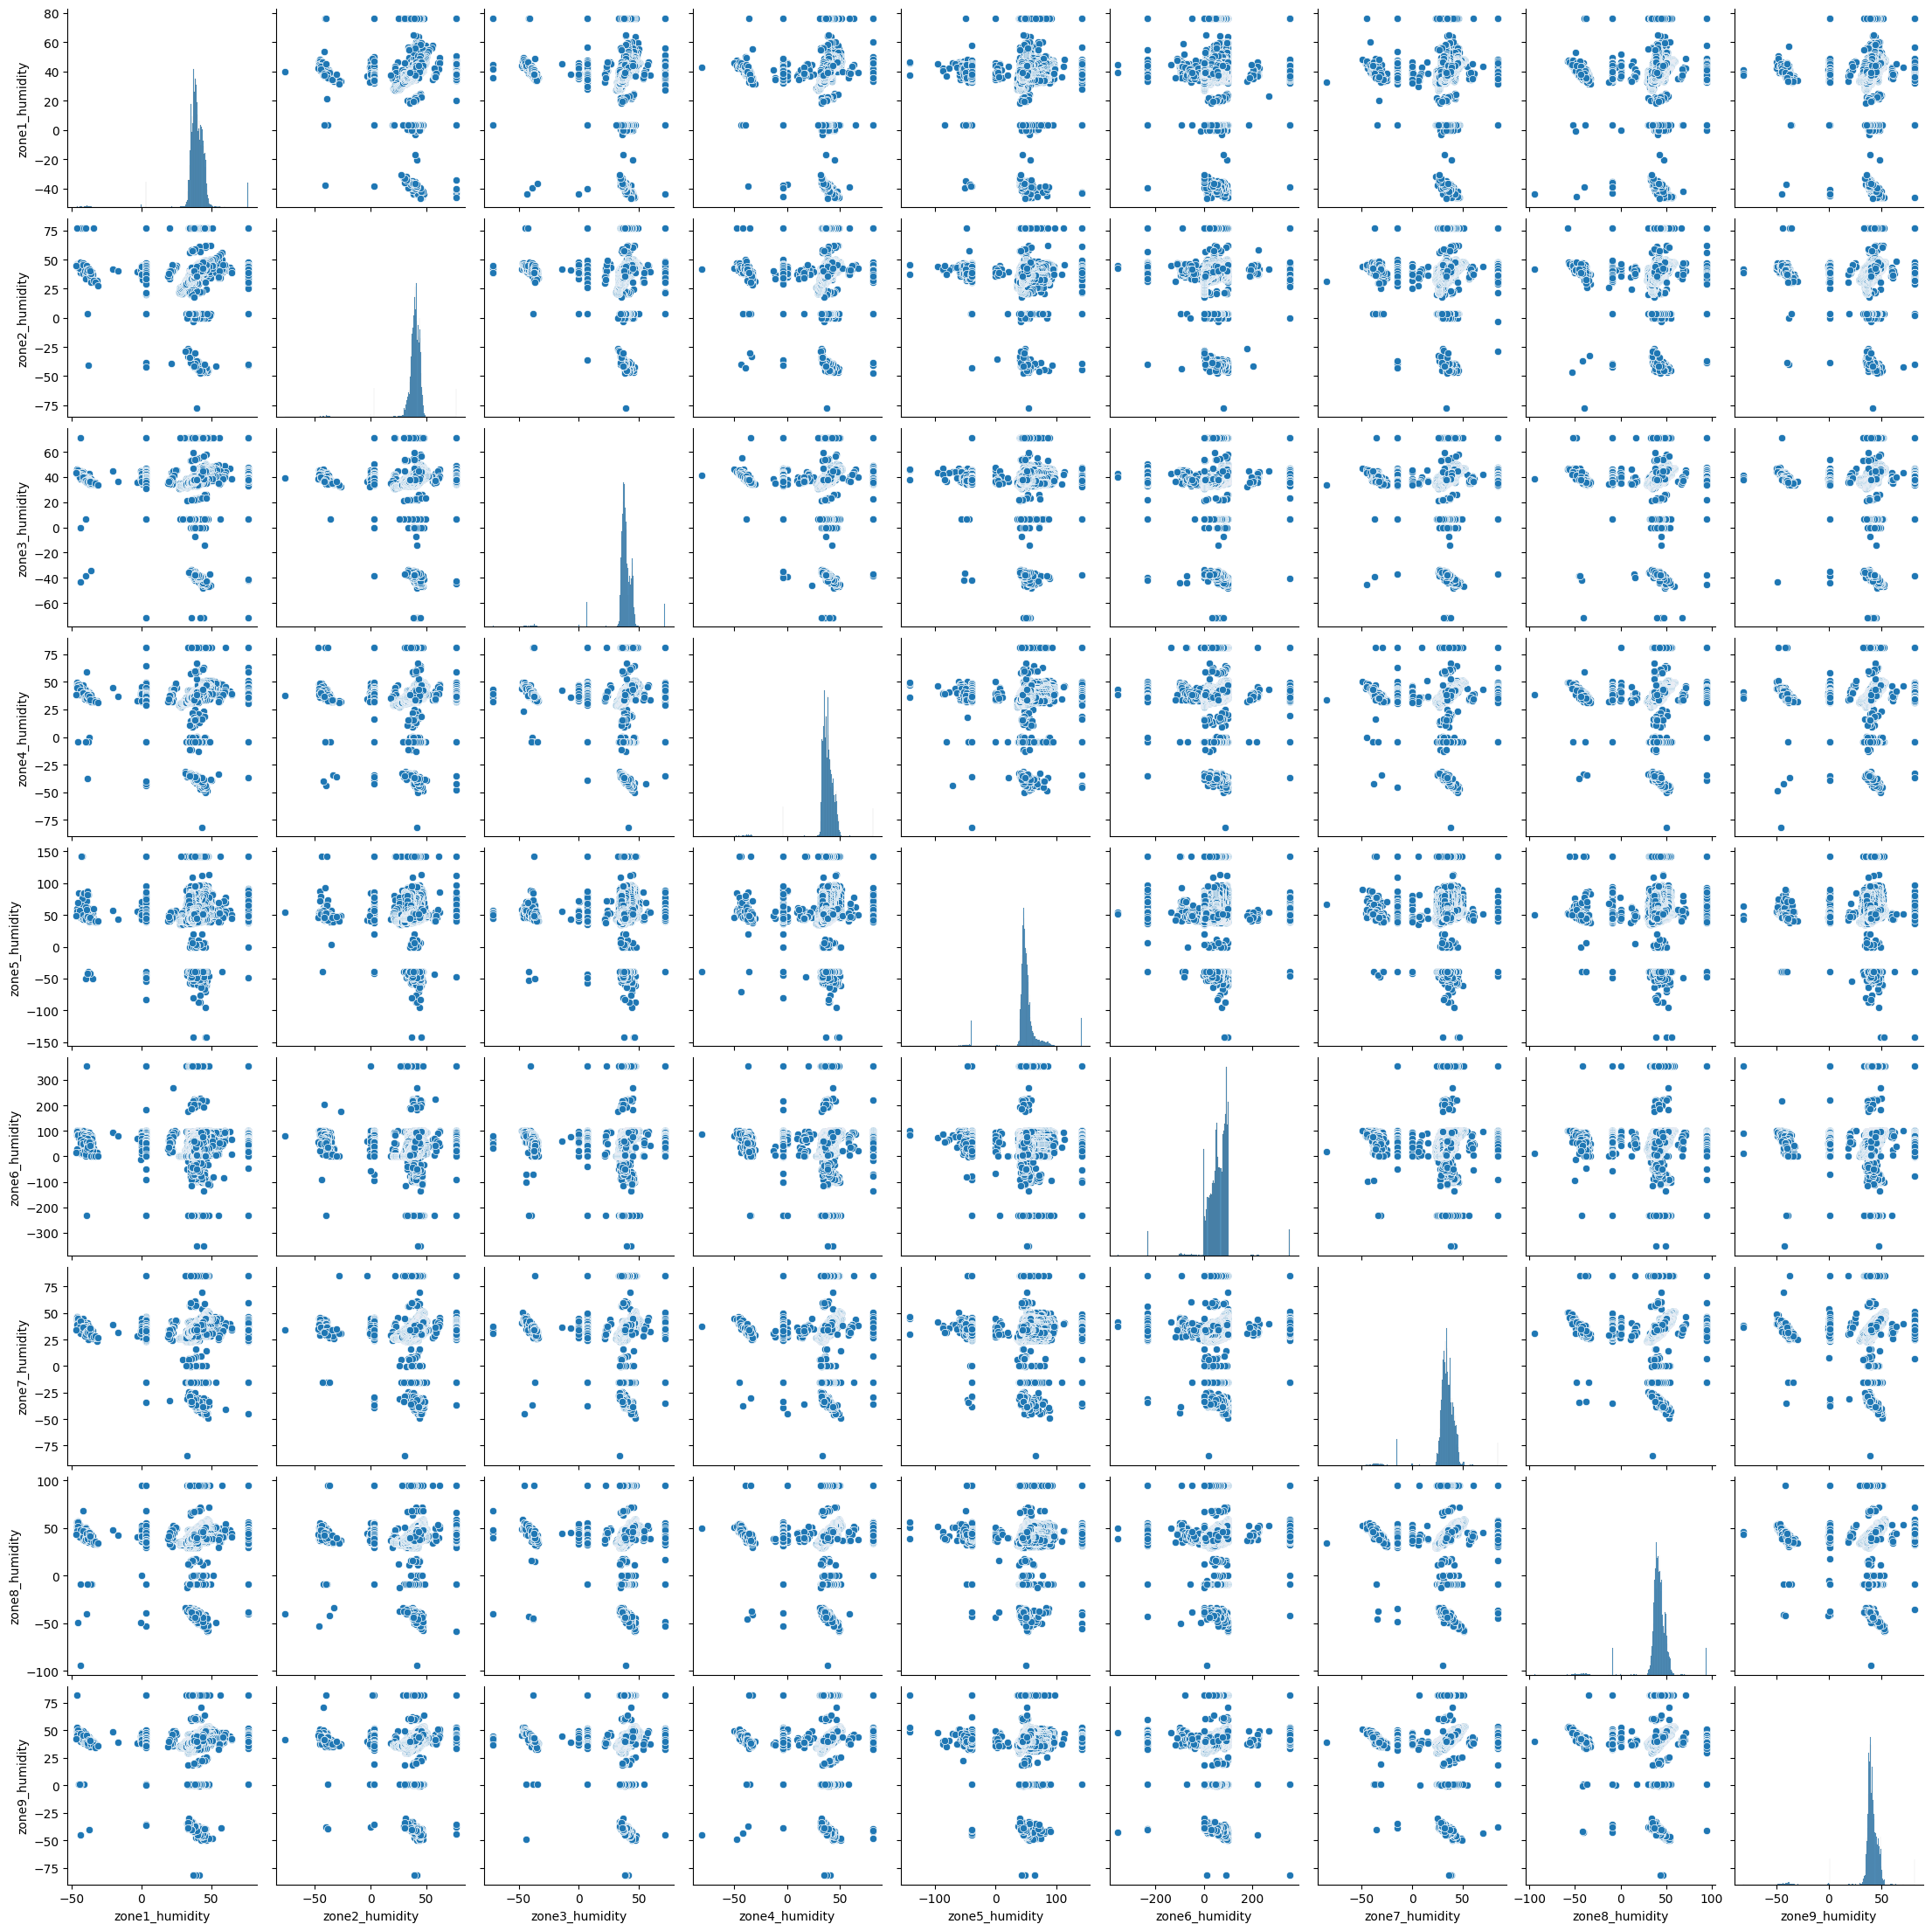

In [37]:
# Pair Plot visualization code
plt.figure(figsize=(25,25))
pair=sns.pairplot(df_energy[hu_cols], diag_kind='hist')
plt.show()

#####  What is/are the insight(s) found from the chart?


* Humidity columns may be lead to multicolinearity.It will be treated upcoming steps.

#### Chart - 15 - Pair Plot of Weather Columns

<Figure size 2500x2500 with 0 Axes>

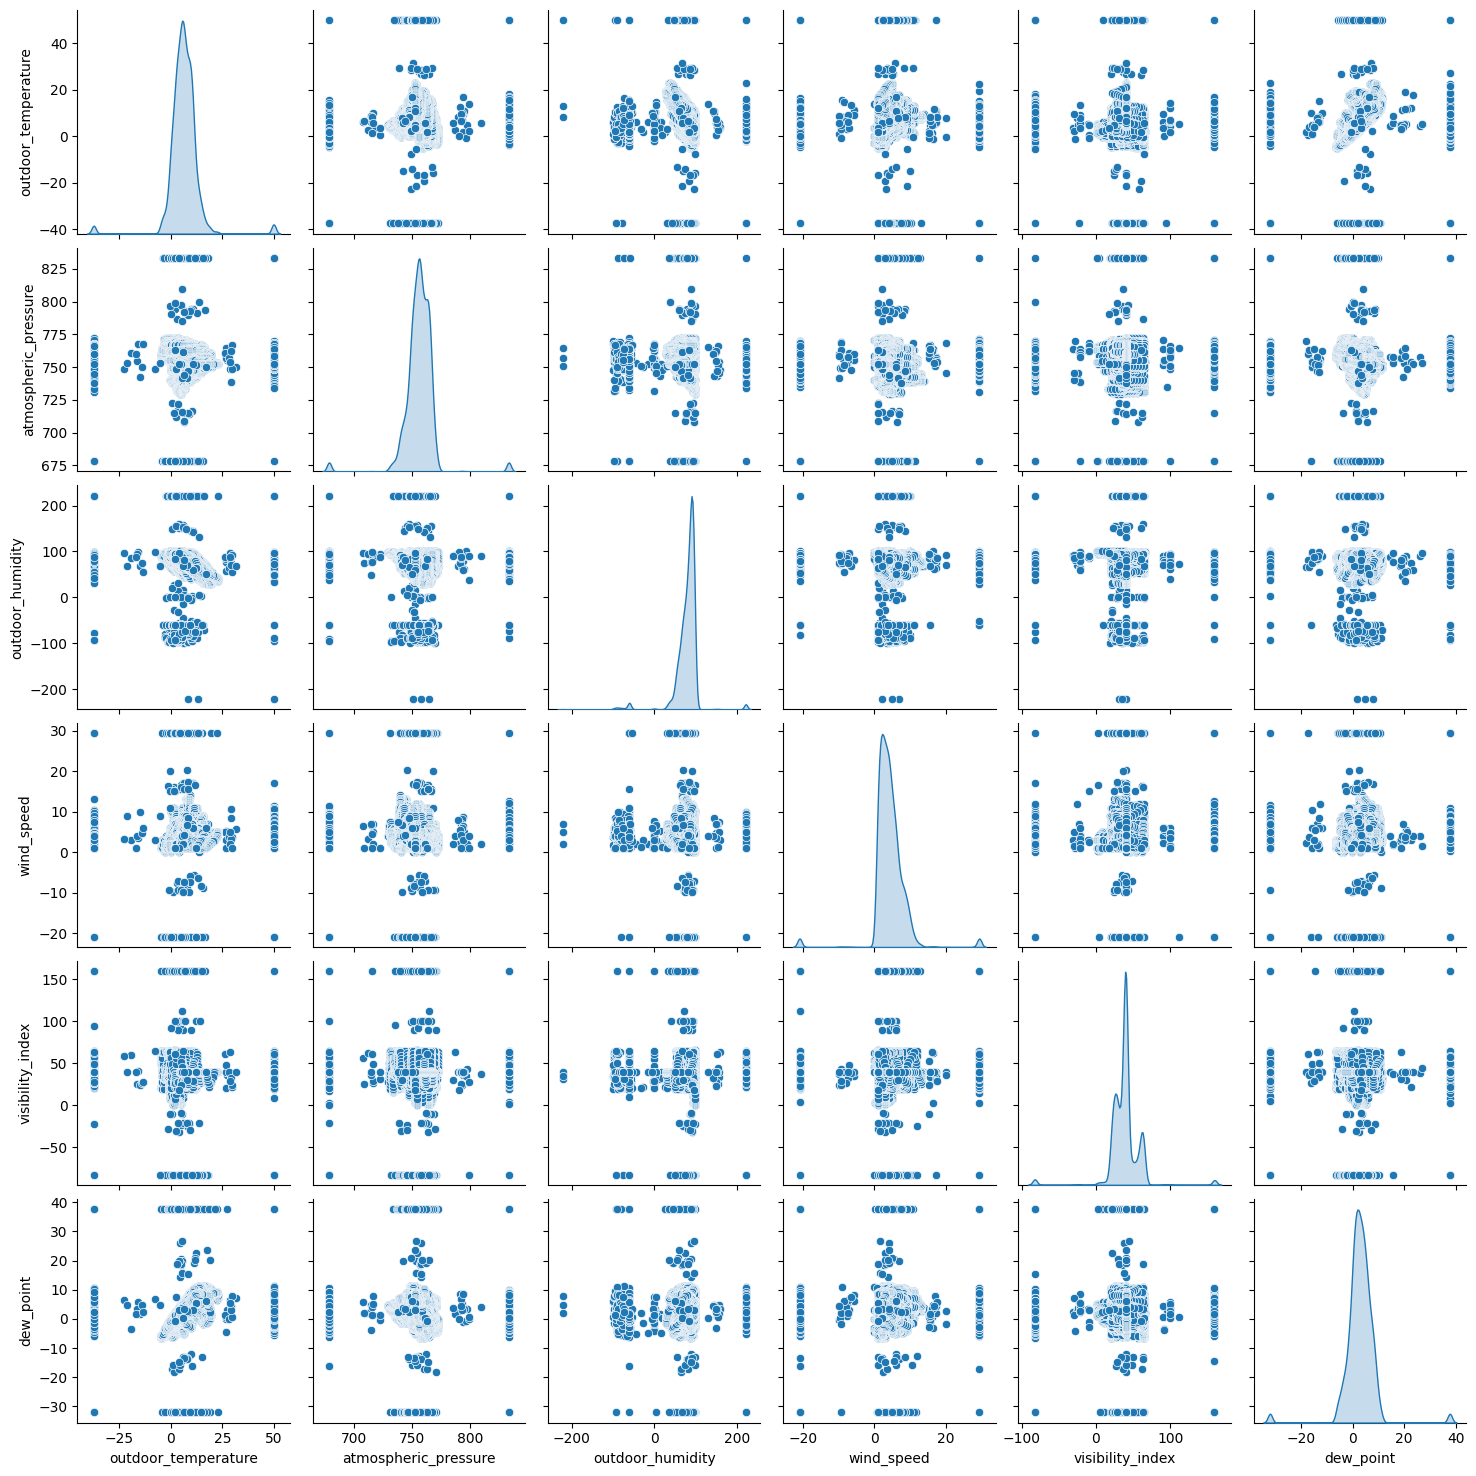

In [38]:
# Pair Plot visualization code
plt.figure(figsize=(25,25))
pair=sns.pairplot(df_energy[weather_cols], diag_kind='kde')
plt.show()

#####  What is/are the insight(s) found from the chart?

* Temperature may be leads into multicolinearity.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.  There is no change in equipment_energy_consumption  on weekdays and weekend.

2. There is no significant difference in the energy consumption for equipment between day and night.

3. The mean temperature in zone1 is greater than zone2.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null** :- There is no change in equipment_energy_consumption on weekdays and weekend

**Alternate** :- There is higher equipment_energy_consumption on weekends as compared to weekdays.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

data_weekday = df_energy[df_energy['weekday'] <= 5][['equipment_energy_consumption']]
data_weekend = df_energy[df_energy['weekday'] > 5][['equipment_energy_consumption']]

#Statistics Test and P-value
t_stat, p_val = stats.ttest_ind(data_weekday, data_weekend, equal_var=True)

print('T-Statistics value', t_stat)
print("P-Value", p_val)

T-Statistics value [0.65030988]
P-Value [0.51550098]


##### Which statistical test have you done to obtain P-Value?

The independent two-sample t-test is the statistical test used to calculate the P-value here.

##### Why did you choose the specific statistical test?

The specific statistical test was chosen because it is appropriate to compare the means of two separate sets of numerical data, as is the case in this situation, which compares overall consumption on weekdays against weekends. Given that the data is continuous and regularly distributed, the t-test assumes that it follows a normal distribution. The equal_var parameter is set to True, assuming that the variances of the two groups are equal.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null:**- There is no significant difference in the  energy consumption for equipment between day and night.

**Alternate:**- There is a significant difference in the  energy consumption for equipment between day and night

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
data_day = df_energy[(df_energy['hour'] >= 6) & (df_energy['hour'] < 18)][['equipment_energy_consumption']]
data_night=df_energy[(df_energy['hour'] < 6) | (df_energy['hour'] >= 18)][['equipment_energy_consumption']]
#Statistics Test and P-value
t_stat, p_val = stats.ttest_ind(data_weekday, data_weekend, equal_var=True)

print('T-Statistics value', t_stat)
print("P-Value", p_val)

T-Statistics value [0.65030988]
P-Value [0.51550098]


##### Which statistical test have you done to obtain P-Value?

The independent two-sample t-test is the statistical test used to calculate the P-value here.

##### Why did you choose the specific statistical test?

The specific statistical test was chosen because it is appropriate to compare the means of two separate sets of numerical data, as is the case in this situation, which compares overall consumption on weekdays against weekends. Given that the data is continuous and regularly distributed, the t-test assumes that it follows a normal distribution. From the parameter we can say that, there is a significant difference in the energy consumption for appliances between day and night.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:**  The mean temperature zone1 is greater than zone2 temperature.

**Alternate Hypothesis:**  The temperature in zone1 is at max zone2 temperature and it can not be above it.

#### 2. Perform an appropriate statistical test.

In [ ]:
#collect the zone1 temperature
zone1_rand= df_energy['zone1_temperature'].sample(1000)
N=len(zone1_rand)


#mean of the sample
zone1_rand_mean= zone1_rand.mean()

zone2 = 20


# the standard deviation for population
std_pop = df_energy['zone1_temperature'].std()
# Perform Statistical Test to obtain P-Value



Z_stat = ((zone1_rand_mean - zone2)/(std_pop/np.sqrt(N)))
print(f'Z_score is {Z_stat} ')

P_value=norm.cdf(Z_stat,0,1)
print(f'P_value is {P_value} ')


Z_score is 18.131562573964814 
P_value is 1.0 


##### Which statistical test have you done to obtain P-Value?

I used the normal cumulative distribution function with the mean and standard deviation of a random sample to calculate the Z statistics for a particular proportion and then find its P_value.

##### Why did you choose the specific statistical test?

Z statistics provides precise values for testing the hypothesis. It is easily comparable to its critical levels.According the result null hypothesis can rejected.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
#find missing values
df_energy.isnull().sum()

equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
month                           0
weekday       

### 2. Handling Outliers

### copy the dataframe

In [ ]:
df=df_energy.copy()
col_list=list(df.describe().columns)


### find the columns have outlier with boxplot

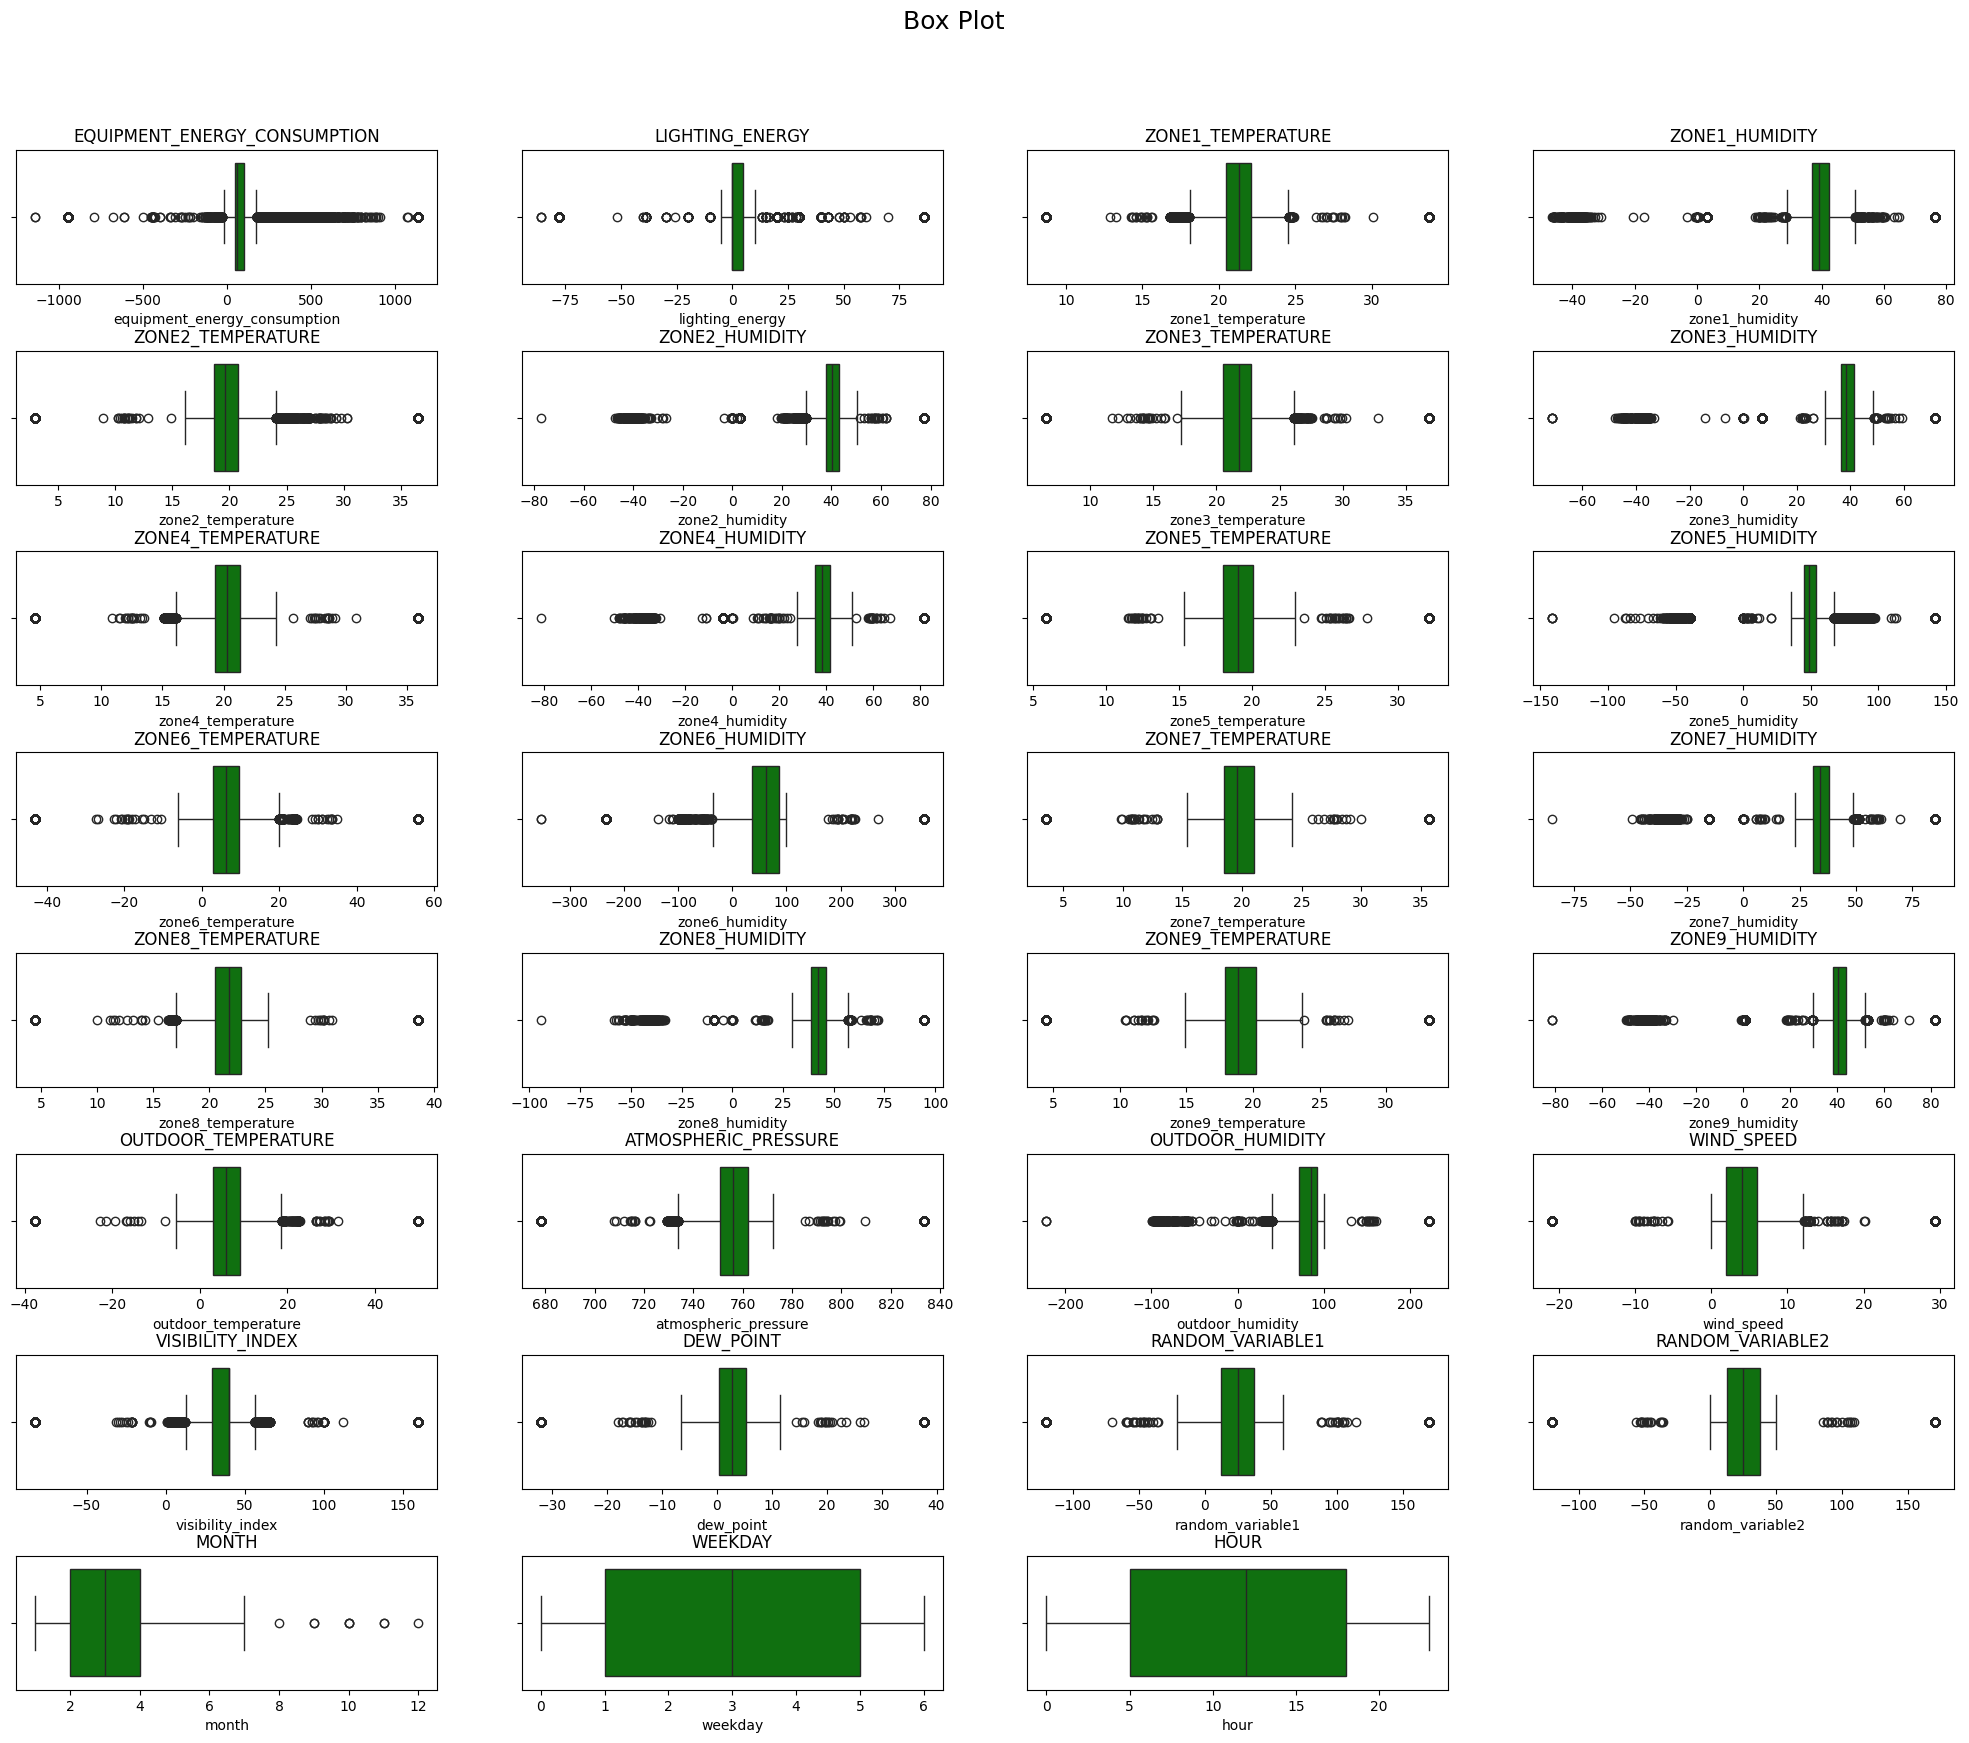

In [ ]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='g', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

**The majority of equipments use between 0 and 200 Wh of energy. It is equipment that many variables contain outliers.**

**Outliers can be found in all temperature column.**

**Outliers also exist in all humidity columns,Windspeed, Tdewpoint, Visibility, and the variable of interest Outliers exist in appliances as well.**

### Handling Outliers & Outlier treatments

In [ ]:
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df[ftr], 25)
  q_75 = np.percentile(df[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    df[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-----------------------------------------------------------\n")

equipment_energy_consumption 

Percentiles: 25th=50.000, 75th=100.000, IQR=50.000

lower = -25.0 and upper = 175.0 
 
Identified outliers: 2318
equipment_energy_consumption Outliers Removed

-----------------------------------------------------------

lighting_energy 

Percentiles: 25th=0.000, 75th=5.000, IQR=5.000

lower = -7.5 and upper = 12.5 
 
Identified outliers: 2438
lighting_energy Outliers Removed

-----------------------------------------------------------

zone1_temperature 

Percentiles: 25th=20.500, 75th=22.100, IQR=1.600

lower = 18.099999999999998 and upper = 24.500000000000004 
 
Identified outliers: 675
zone1_temperature Outliers Removed

-----------------------------------------------------------

zone1_humidity 

Percentiles: 25th=37.000, 75th=42.500, IQR=5.500

lower = 28.75 and upper = 50.75 
 
Identified outliers: 617
zone1_humidity Outliers Removed

-----------------------------------------------------------

zone2_temperature 

Percentiles: 25th=18.600, 75th=20.

### Box Plot without aoutliers

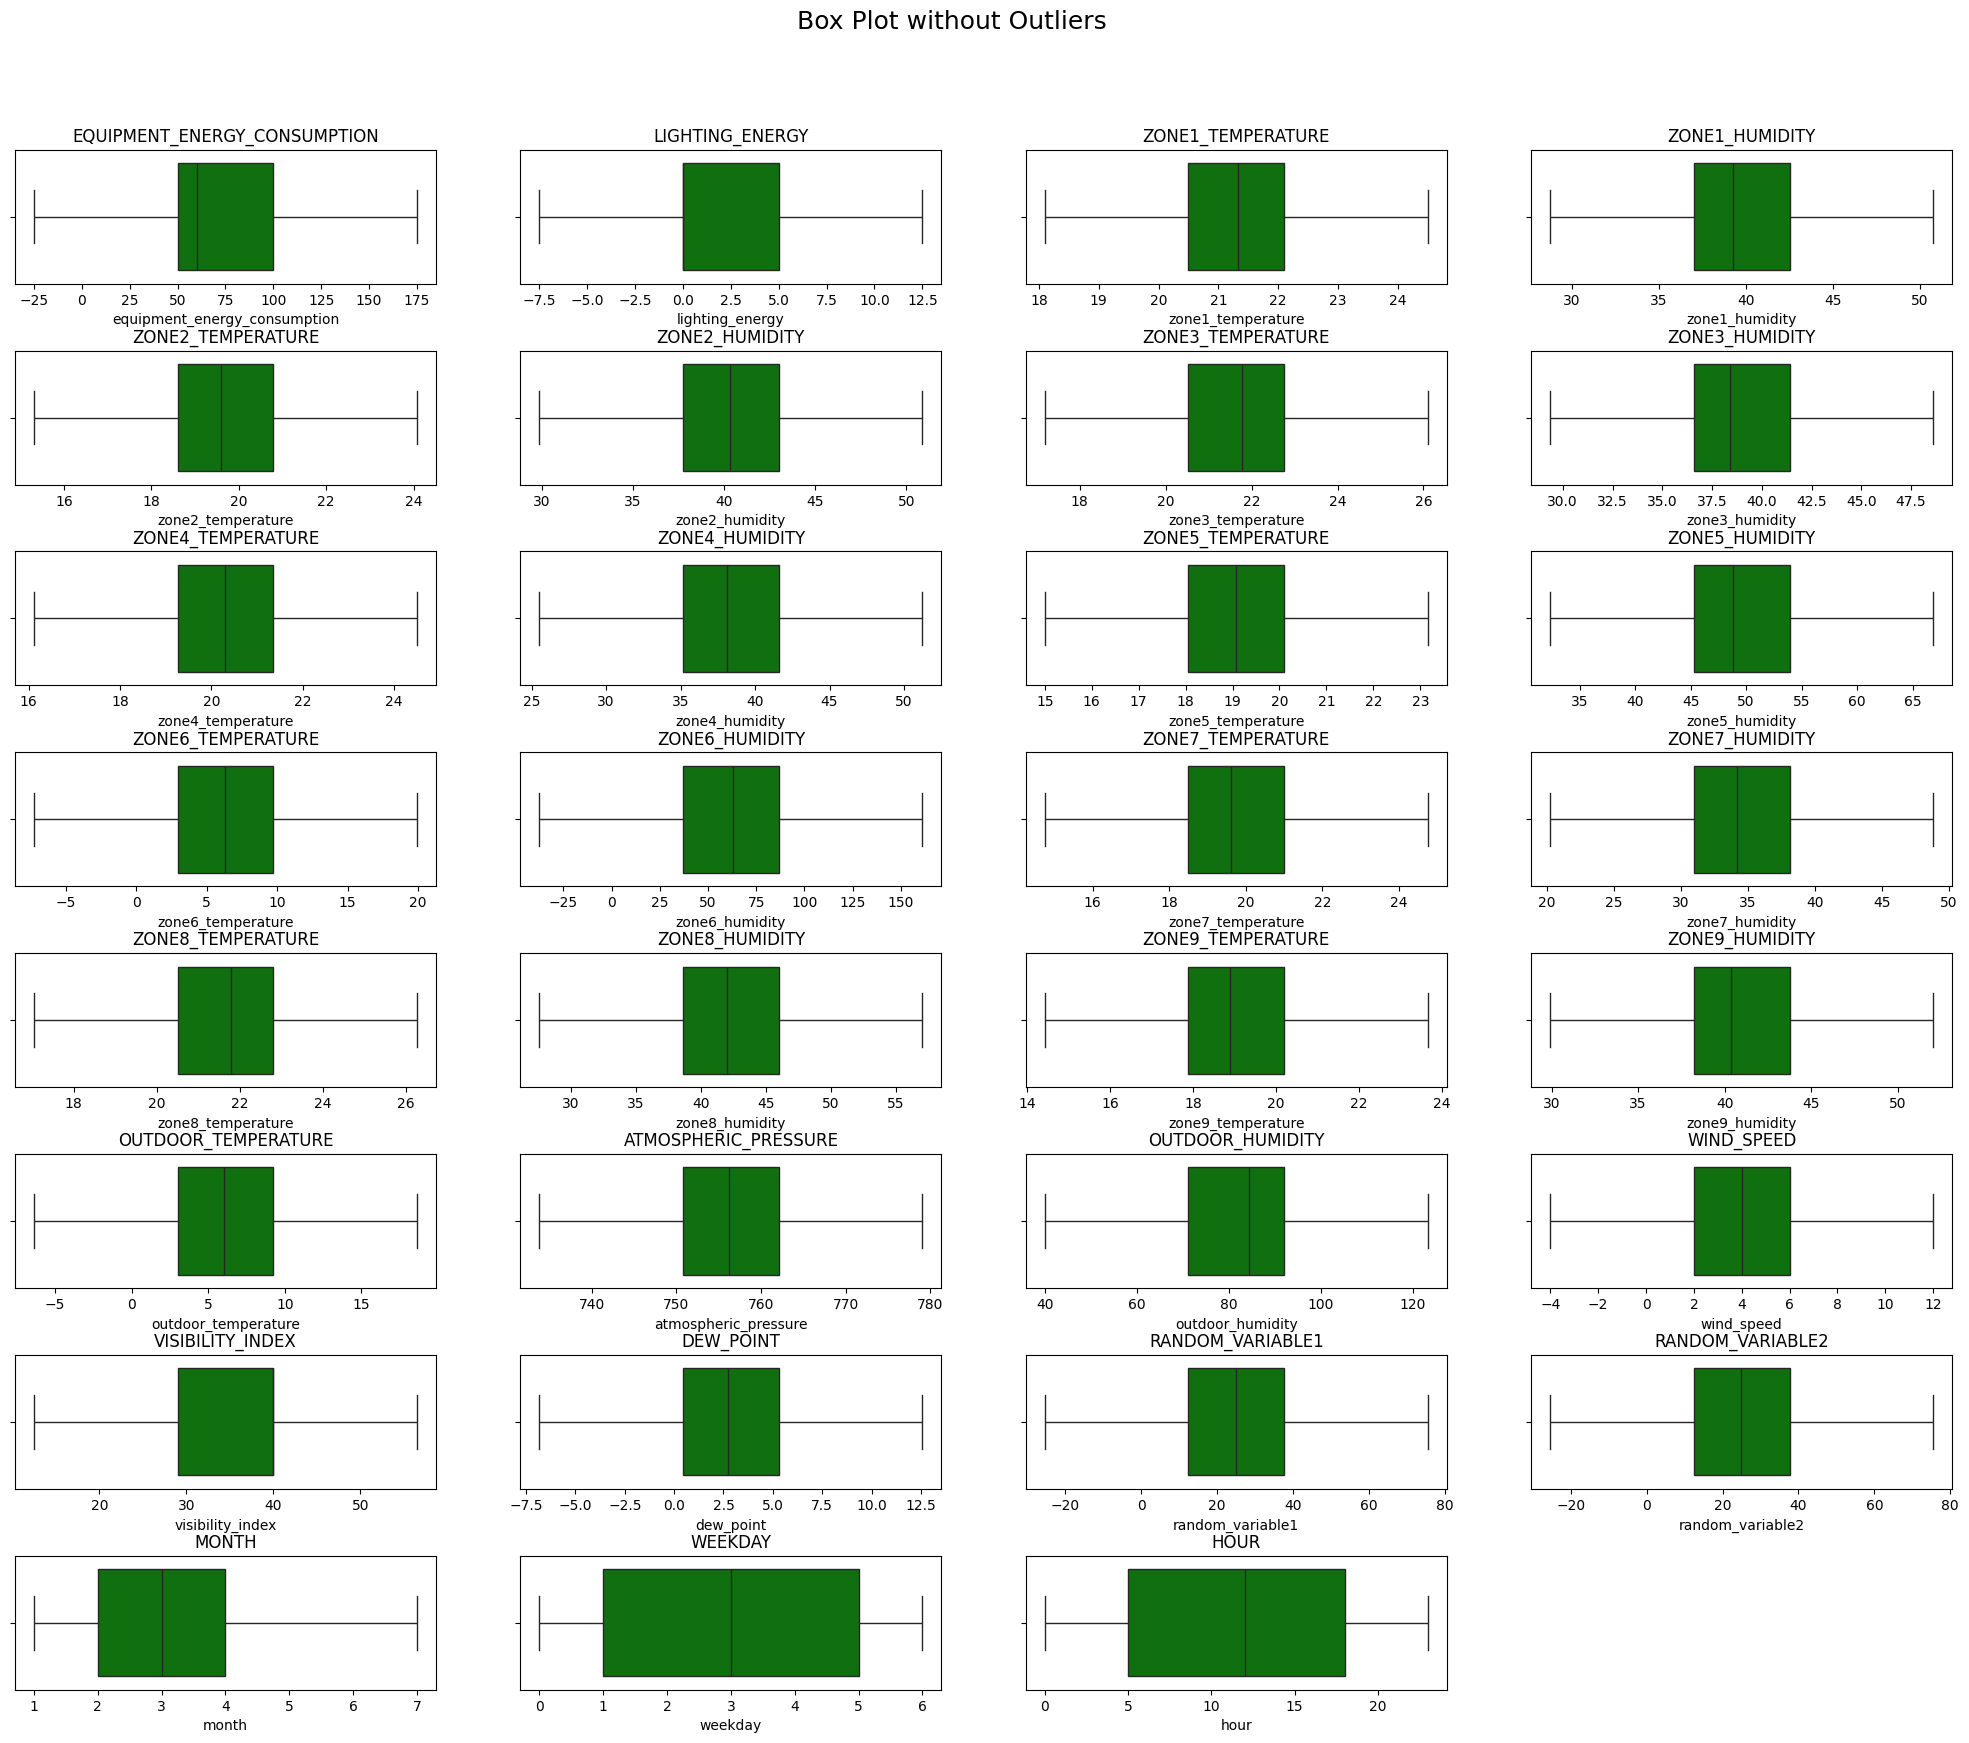

In [46]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='green' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

##### What all outlier treatment techniques have you used and why did you use those techniques?

The box plot is a handy graphical depiction for describing the behaviour of data in the middle and at the ends of distributions. The box plot employs the median as well as the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, the difference (Q3 — Q1) is known as the interquartile range, or IQ. A box plot is made by drawing a box between the higher and lower quartiles and a solid line across the box to find the median. The following quantities (referred to as fences) are required for recognising extreme values in the distribution's tails:

lower fence: Q1–1.5*IQ

upper fence: Q3 + 1.5*IQ

### 3. Categorical Encoding

In [47]:
#check again types of all features
df.dtypes

equipment_energy_consumption    float64
lighting_energy                 float64
zone1_temperature               float64
zone1_humidity                  float64
zone2_temperature               float64
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64
visibility_index                float64


There are no categorical features present in the dataset.So any categorical encoding does not required

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# create a column average building temperature based on all temperature
df['Average_Temperature']=df[['zone1_temperature','zone2_temperature','zone3_temperature','zone4_temperature','zone5_temperature','zone6_temperature','zone7_temperature','zone8_temperature']].mean(axis=1)


#create a column of difference between outside and inside temperature
df['Temperature_difference']=abs(df['Average_Temperature']-df['outdoor_temperature'])




#create a column average building humidity
df['Average_humidity']=df[['zone1_humidity','zone2_humidity','zone3_humidity', 'zone4_humidity','zone5_humidity','zone6_humidity','zone7_humidity','zone8_humidity']].mean(axis=1)


#create a column of difference between outside and inside building humidity
df['Humidity_difference']=abs(df['outdoor_humidity']-df['Average_humidity'])


#### 2. Feature Selection

Firstly, we are going to drop two random variable column because they have no part in energy prediction.After that we will check multicolinearity among remaining columns.

In [60]:
#drop rv1 and rv2
df.drop('random_variable1',axis=1,inplace=True)
df.drop('random_variable2',axis=1,inplace=True)

In [61]:
df.head(2)

equipment_energy_consumption  lighting_energy  \
timestamp                                                            
2016-01-11 17:00:00                          60.0             -7.5   
2016-01-11 17:10:00                          60.0             12.5   

                     zone1_temperature  zone1_humidity  zone2_temperature  \
timestamp                                                                   
2016-01-11 17:00:00              24.50       47.596667               19.2   
2016-01-11 17:10:00              19.89       46.693333               19.2   

                     zone2_humidity  zone3_temperature  zone3_humidity  \
timestamp                                                                
2016-01-11 17:00:00         44.7900              19.79        38.20158   
2016-01-11 17:10:00         44.7225              19.79        44.79000   

                     zone4_temperature  zone4_humidity  ...  wind_speed  \
timestamp                                               ...               
2016-01-11 17:00:00               19.0       45.566667  ...    7.000000   
2016-01-11 17:10:00               19.0       45.992500  ...    6.666667   

                     visibility_index  dew_point  month  weekday  hour  \
timestamp                                                                
2016-01-11 17:00:00              56.5        5.3    1.0        0    17   
2016-01-11 17:10:00              56.5        5.2    1.0        0    17   

                     Average_Temperature  Temperature_difference  \
timestamp                                                          
2016-01-11 17:00:00            17.690597               11.090597   
2016-01-11 17:10:00            17.160000               10.676667   

                     Average_humidity  Humidity_difference  
timestamp                                                   
2016-01-11 17:00:00         50.767281            41.232719  
2016-01-11 17:10:00         51.481875            40.518125  

[2 rows x 33 columns]

### 2.1 **Checking Multicollinearity**

In [62]:
#create a function to check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]

    return(vif)

In [63]:
#check multicolinearuty
calc_vif(df[[i for i in df.describe().columns if i not in ['equipment_energy_consumption']]]).sort_values(by='VIF',ascending=False)

variables      VIF
1        zone1_temperature      inf
2           zone1_humidity      inf
3        zone2_temperature      inf
4           zone2_humidity      inf
6           zone3_humidity      inf
5        zone3_temperature      inf
7        zone4_temperature      inf
8           zone4_humidity      inf
12          zone6_humidity      inf
9        zone5_temperature      inf
10          zone5_humidity      inf
11       zone6_temperature      inf
14          zone7_humidity      inf
13       zone7_temperature      inf
15       zone8_temperature      inf
16          zone8_humidity      inf
28     Average_Temperature      inf
30        Average_humidity      inf
29  Temperature_difference  4262.90
21        outdoor_humidity  2104.79
19     outdoor_temperature  1380.38
20    atmospheric_pressure   764.63
31     Humidity_difference   578.31
17       zone9_temperature   502.82
18          zone9_humidity   225.20
25                   month    34.06
23        visibility_index    13.03
27                    hour     6.13
24               dew_point     5.22
22              wind_speed     4.42
26                 weekday     3.51
0          lighting_energy     1.51

It's look like lots of column is replica of one another.so we are going to remove atleast half of them

In [64]:
df.columns

Index(['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature',
       'zone1_humidity', 'zone2_temperature', 'zone2_humidity',
       'zone3_temperature', 'zone3_humidity', 'zone4_temperature',
       'zone4_humidity', 'zone5_temperature', 'zone5_humidity',
       'zone6_temperature', 'zone6_humidity', 'zone7_temperature',
       'zone7_humidity', 'zone8_temperature', 'zone8_humidity',
       'zone9_temperature', 'zone9_humidity', 'outdoor_temperature',
       'atmospheric_pressure', 'outdoor_humidity', 'wind_speed',
       'visibility_index', 'dew_point', 'month', 'weekday', 'hour',
       'Average_Temperature', 'Temperature_difference', 'Average_humidity',
       'Humidity_difference'],
      dtype='object')

In [65]:
#check Multicolinearity
calc_vif(df[[i for i in df.describe().columns if i not in [ 'Average_Temperature','Average_humidity',]]]).sort_values(by='VIF',ascending=False)

variables      VIF
29        Temperature_difference  4263.26
22              outdoor_humidity  2104.81
20           outdoor_temperature  1380.49
2              zone1_temperature  1061.04
21          atmospheric_pressure   765.15
6              zone3_temperature   685.73
10             zone5_temperature   626.34
30           Humidity_difference   578.32
16             zone8_temperature   572.23
8              zone4_temperature   545.03
4              zone2_temperature   524.12
18             zone9_temperature   502.87
14             zone7_temperature   494.60
7                 zone3_humidity   339.05
5                 zone2_humidity   250.56
3                 zone1_humidity   242.90
19                zone9_humidity   225.85
9                 zone4_humidity   194.72
17                zone8_humidity   156.39
15                zone7_humidity   116.68
11                zone5_humidity    73.62
26                         month    34.19
13                zone6_humidity    33.07
12             zone6_temperature    30.67
24              visibility_index    13.03
28                          hour     6.27
25                     dew_point     5.22
0   equipment_energy_consumption     4.66
23                    wind_speed     4.42
27                       weekday     3.51
1                lighting_energy     1.56

In [66]:
#check Multicolinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['zone1_temperature',
       'zone1_humidity', 'zone2_temperature', 'zone2_humidity',
       'zone3_temperature', 'zone3_humidity', 'zone4_temperature',
       'zone4_humidity', 'zone5_temperature', 'zone7_temperature',
        'zone8_temperature','zone9_temperature', 'zone9_humidity',
       'atmospheric_pressure', 'outdoor_humidity', 'zone8_humidity',
       'Average_Temperature', 'Temperature_difference', 'Average_humidity',
       'Humidity_difference']]]).sort_values(by='VIF',ascending=False)

variables    VIF
5                 zone7_humidity  52.18
2                 zone5_humidity  44.82
8               visibility_index  11.82
6            outdoor_temperature   9.85
10                         month   9.45
4                 zone6_humidity   9.21
3              zone6_temperature   8.40
12                          hour   4.71
0   equipment_energy_consumption   4.39
7                     wind_speed   4.17
11                       weekday   3.24
9                      dew_point   3.08
1                lighting_energy   1.50

In [67]:
#check Multicolinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['zone1_temperature',
       'zone1_humidity', 'zone2_temperature', 'zone2_humidity',
       'zone3_temperature', 'zone3_humidity', 'zone4_temperature',
       'zone4_humidity', 'zone5_temperature', 'zone7_temperature',
        'zone8_temperature','zone9_temperature', 'zone9_humidity',
       'atmospheric_pressure', 'outdoor_humidity', 'zone8_humidity','zone7_humidity','zone5_humidity','visibility_index','outdoor_temperature','Average_Temperature', 'Temperature_difference', 'Average_humidity',
       'Humidity_difference']]]).sort_values(by='VIF',ascending=False)

variables   VIF
2             zone6_temperature  5.68
6                         month  5.04
0  equipment_energy_consumption  4.31
8                          hour  4.30
4                    wind_speed  3.64
3                zone6_humidity  3.46
7                       weekday  3.14
5                     dew_point  2.56
1               lighting_energy  1.49

In [68]:
# Select your features wisely to avoid overfitting
df_removed=df[[i for i in df.describe().columns if i not in['zone1_temperature','zone1_humidity', 'zone2_temperature', 'zone2_humidity','zone3_temperature', 'zone3_humidity', 'zone4_temperature''zone4_humidity', 'zone5_temperature', 'zone7_temperature','zone8_temperature','zone9_temperature', 'zone9_humidity','atmospheric_pressure', 'outdoor_humidity', 'zone8_humidity','zone7_humidity','zone5_humidity','visibility_index','Average_Temperature','Temperature_difference', 'Average_humidity','Humidity_difference']]]

df_removed.head()

equipment_energy_consumption  lighting_energy  \
timestamp                                                            
2016-01-11 17:00:00                          60.0             -7.5   
2016-01-11 17:10:00                          60.0             12.5   
2016-01-11 17:20:00                          50.0             12.5   
2016-01-11 17:30:00                          50.0             12.5   
2016-01-11 17:40:00                          60.0             12.5   

                     zone4_temperature  zone4_humidity  zone6_temperature  \
timestamp                                                                   
2016-01-11 17:00:00          19.000000       45.566667           6.468110   
2016-01-11 17:10:00          19.000000       45.992500           6.833333   
2016-01-11 17:20:00          24.501667       45.890000           6.560000   
2016-01-11 17:30:00          24.501667       45.723333           6.433333   
2016-01-11 17:40:00          18.890000       45.530000           6.366667   

                     zone6_humidity  outdoor_temperature  wind_speed  \
timestamp                                                              
2016-01-11 17:00:00       84.256667             6.600000    7.000000   
2016-01-11 17:10:00       84.063333             6.483333    6.666667   
2016-01-11 17:20:00       83.156667             6.366667    6.333333   
2016-01-11 17:30:00       83.423333             6.250000    6.000000   
2016-01-11 17:40:00       84.893333             6.133333    5.666667   

                     dew_point  month  weekday  hour  
timestamp                                             
2016-01-11 17:00:00      5.300    1.0        0    17  
2016-01-11 17:10:00      5.200    1.0        0    17  
2016-01-11 17:20:00      5.100    1.0        0    17  
2016-01-11 17:30:00     12.575    1.0        0    17  
2016-01-11 17:40:00      4.900    1.0        0    17

##### What all feature selection methods have you used  and why?

I use Variance Inflation Factor(VIF) for feature selection.

The Variance Inflation Factor (VIF) is used to detect multicollinearity. Variance inflation factors (VIF) quantify how much the variance of predicted regression coefficients is inflated when the predictor variables are not linearly connected.

##### Which all features you found important and why?

In a multivariate regression model, multicollinearity exists when there is a correlation between many independent variables. Under ideal conditions, small VIF values, such as VIF< 10, suggest low correlation across variables. The VIF cutoff value is set to 10. Only variables having a VIF less than 10 will be included in the model.

According to above stated criteria, we have removed column one by one and check whether all the features vif value is less than 10 or not.Once all the vif value of features is below 10 then we stop the checking multicolinearity. Important features for the project that we have found are equipment_energy_consumption,lighting_energy	,zone4_temperature	,zone4_humidity	,zone6_temperature	zone6_humidity,	outdoor_temperature,wind_speed,dew_point, month, weekday, hour.

### 5. Data Transformation

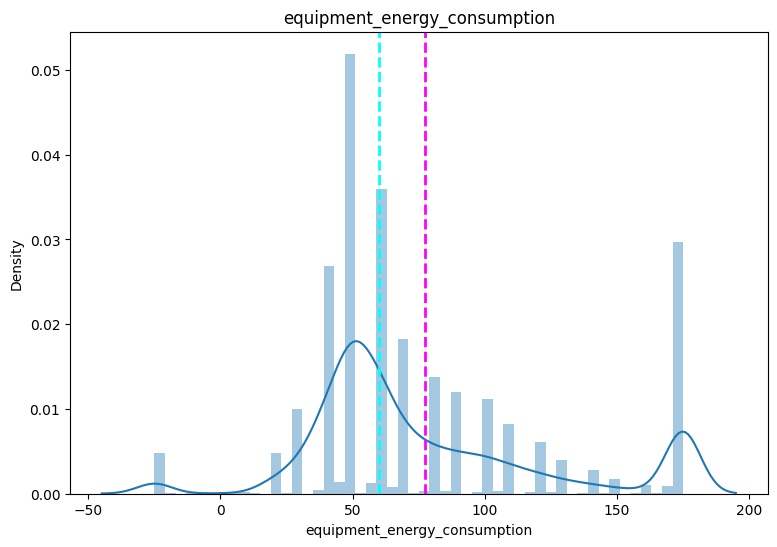

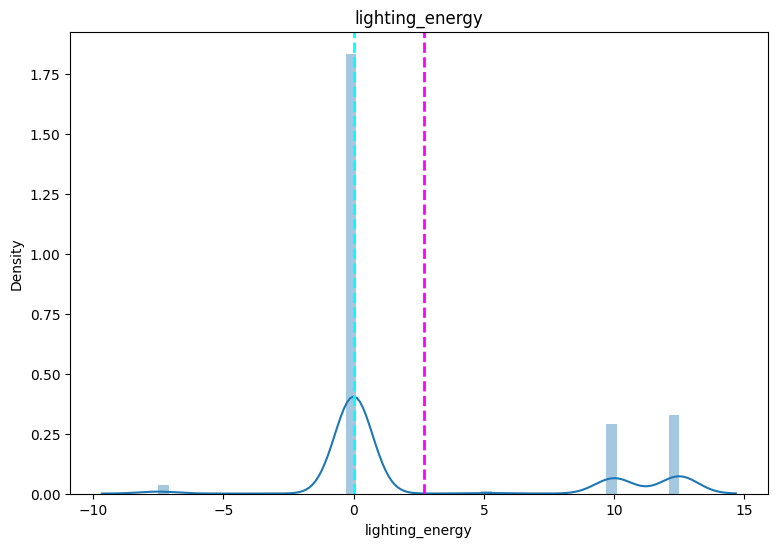

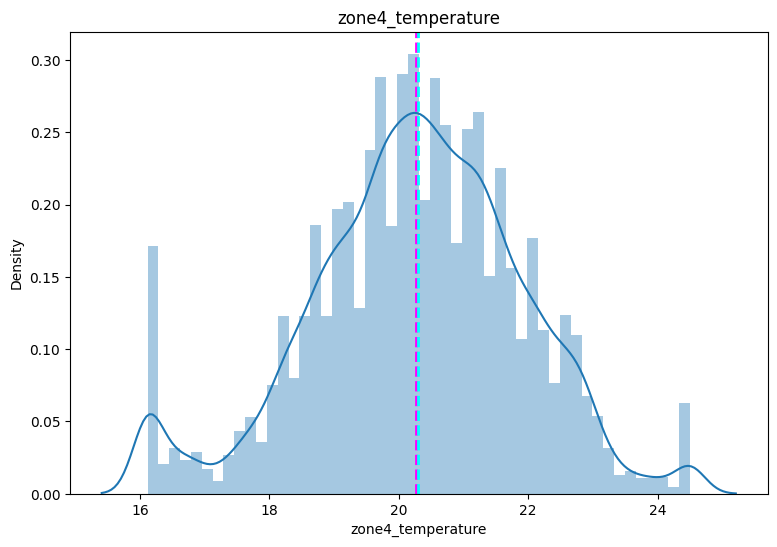

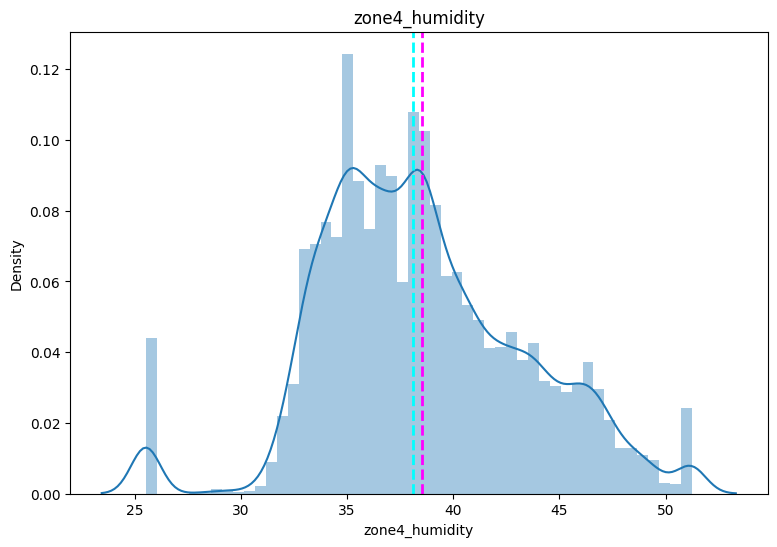

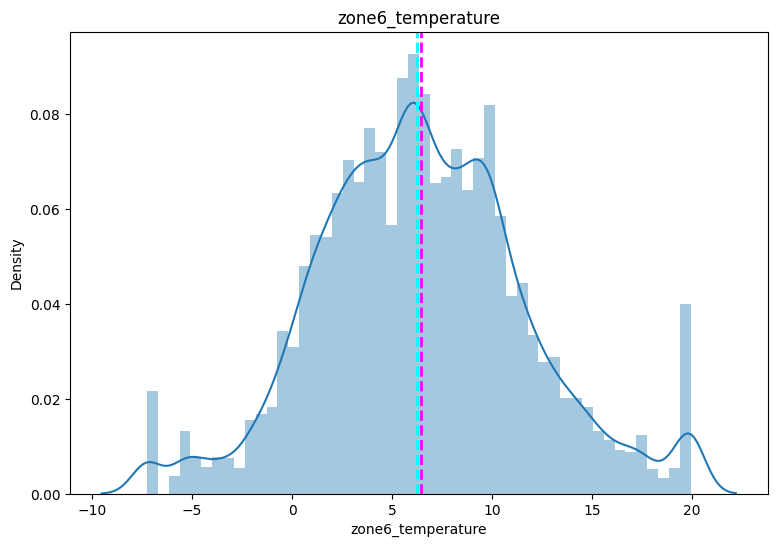

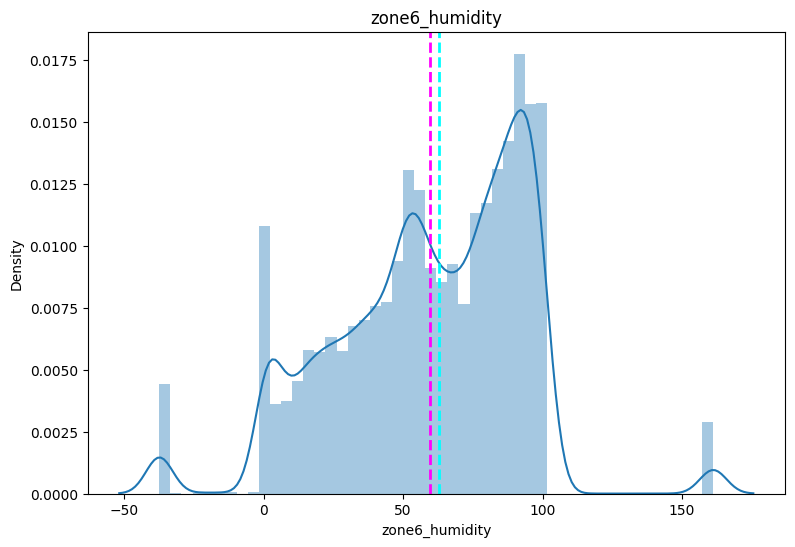

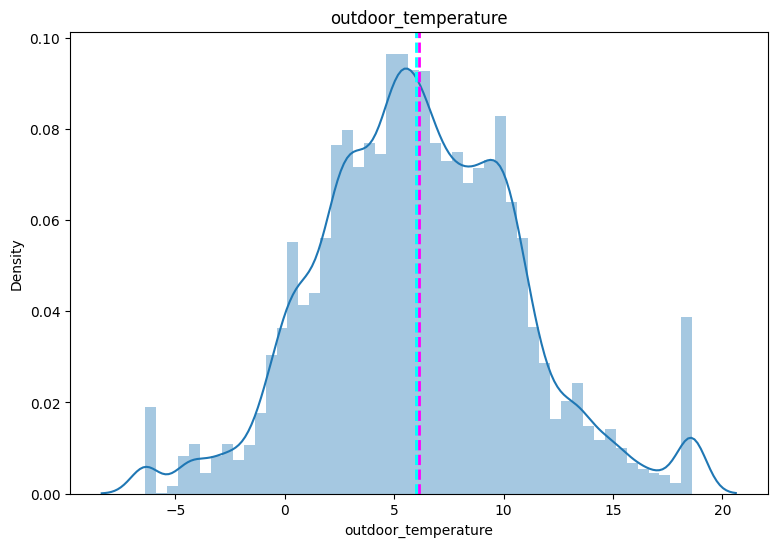

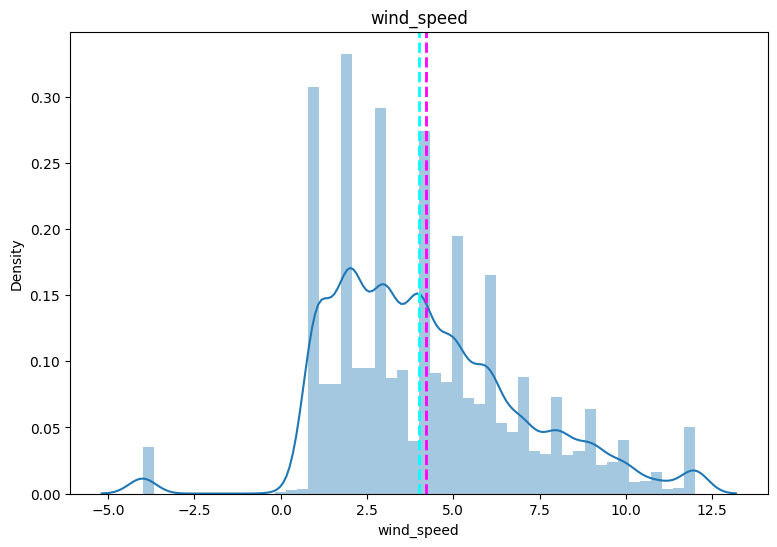

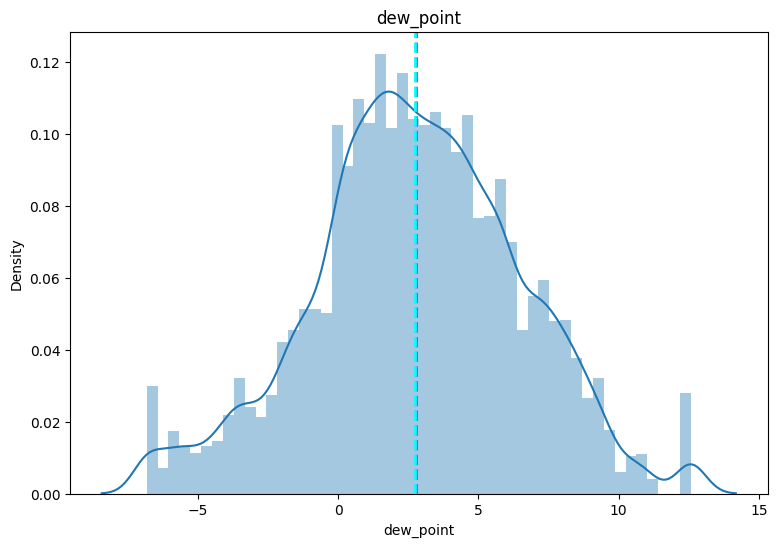

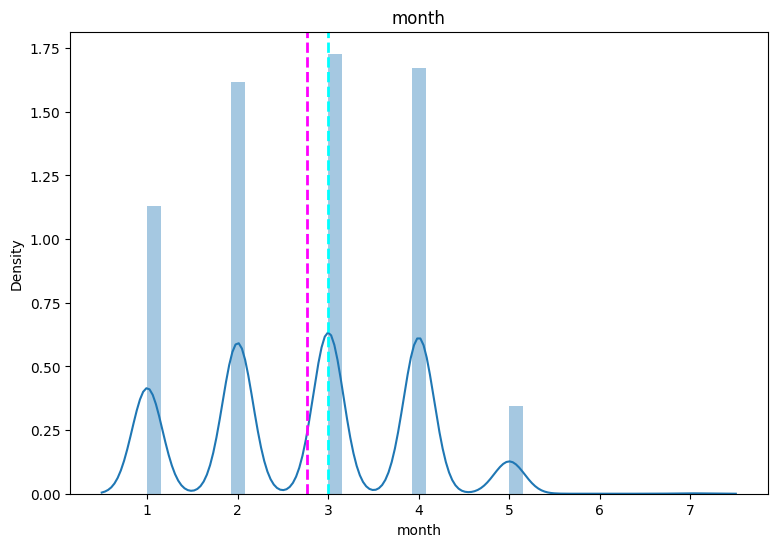

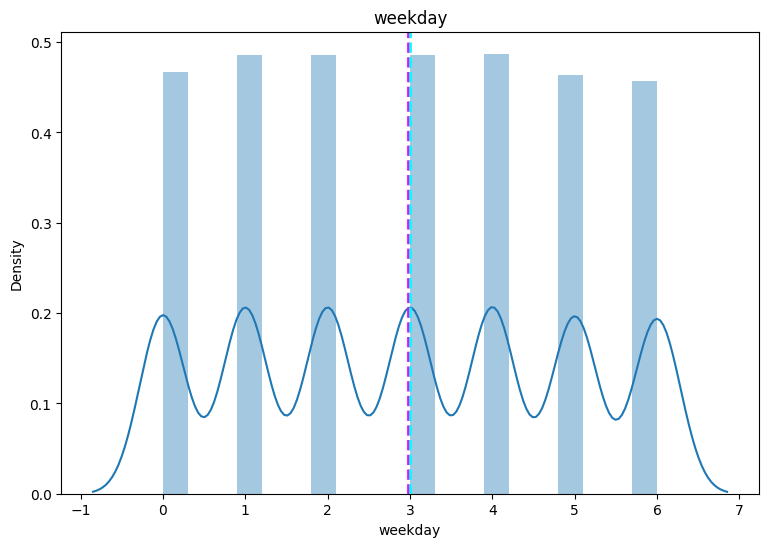

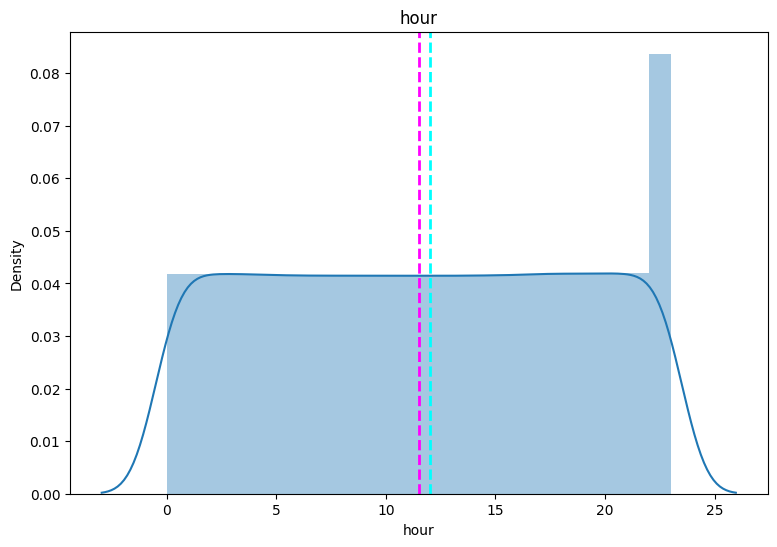

In [69]:
#check distribution  of all independent features
for col in df_removed.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction, to the best of my knowledge, is not required for this dataset.

Essentially, where high dimensions are a problem or a specific point in the algorithm of dimension reduction.In this dataset no such problem is present according to my knoldege.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 7. Data Splitting

In [72]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=df_removed.drop('equipment_energy_consumption',axis=1)
y=df_removed['equipment_energy_consumption']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

##### What data splitting ratio have you used and why?

The code divides the data into training and testing sets using an 80:20 ratio. This indicates that 80% of the data is utilised to train the model, while 20% is used to test the model.

The ratio is determined by a number of parameters, including the size of the dataset, the complexity of the model, and the amount of computational resources available. In general, a larger training set produces a stronger model, but a smaller testing set produces a higher variance in performance measurements. An 80:20 ratio is an excellent choice since it balances the trade-off between having enough data to train the model and having enough data to evaluate the model's performance.

### 8. Data Scaling

In [74]:
# Scaling your data
# Scaling your data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
X.isnull().sum()

lighting_energy        0
zone4_temperature      0
zone4_humidity         0
zone6_temperature      0
zone6_humidity         0
outdoor_temperature    0
wind_speed             0
dew_point              0
month                  0
weekday                0
hour                   0
dtype: int64

##### Which method have you used to scale you data and why?

The data is scaled using Min-Max scaling or normalisation, which scales the data to a range between 0 and 1.

This approach was chosen because it preserves the distribution of the data and the relationships between the features. Furthermore, many machine learning algorithms perform better with scaled data, particularly those that use distance-based metrics or optimisation functions. Scaling was done with Scikit-learn's MinMaxScaler function.

In [77]:
#spearate two rows from test  set to check it with best model
X_test_best= X_test_scaled[-2:]
y_test_best= y_test[-2:]
X_test_scaled= X_test_scaled[:-2]
y_test=y_test[:-2]

In [78]:
X_test_best

array([[1.        , 0.50973768, 0.70824689, 0.61666258, 0.68572684,
        0.623     , 0.71875   , 0.75042955, 0.16666667, 0.5       ,
        0.56521739],
       [0.625     , 0.3559221 , 0.43477697, 0.48602256, 0.46286604,
        0.46833333, 1.        , 0.26073883, 0.16666667, 0.        ,
        0.56521739]])

In [79]:
#check shape of all separated variables
print(X_test_best.shape)
print(y_test_best.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(2, 11)
(2,)
(3356, 11)
(3356,)


In [80]:
x_test_scaled=X_test_scaled[:-2]
x_test_scaled.shape

(3354, 11)

## ***7. ML Model Implementation***

### ML Model 
### 1.Linear Regression

In [81]:
# ML Model - 1 Implementation
#LinearRegresseion
lr=LinearRegression()
# Fit the LinearRegression
lr.fit(X_train_scaled,y_train)
#predict the target values of train data
lr_train=lr.predict(X_train_scaled)
# Predict the target values for the test data
y_pred_lr = lr.predict(X_test_scaled)
#Evaluate the model using
mse_lr_train=mean_squared_error(y_train,lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr)
r2_lr_train=r2_score(y_train,lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr)

print("LinearRegression Mean Squared Error:",mse_lr_test)
print("LinearRegression R^2 Score:",r2_lr_test)


##Ridge
ridge = Ridge()
# Fit the Ridge model
ridge.fit(X_train_scaled, y_train)
#predict the target values of train data
r_train=ridge.predict(X_train_scaled)
# Predict  values for the test data
y_pred_r = ridge.predict(X_test_scaled)
# Evaluate the model using metrics
mse_r_train=mean_squared_error(y_train,r_train)
mse_r_test =mean_squared_error(y_test, y_pred_r)
r2_r_train=r2_score(y_train,r_train)
r2_r_test = r2_score(y_test, y_pred_r)

print("Ridge Mean Squared Error:",mse_r_test)
print("Ridge R^2 Score:",r2_r_test)


#Lasso
lasso = Lasso()
# Fit the Lasso model on the training data
lasso.fit(X_train_scaled, y_train)
#predict the target values of train data
l_train=ridge.predict(X_train_scaled)
# Predict the target values for the test data
y_pred_l = lasso.predict(X_test_scaled)
# Evaluate the model using metrics
mse_l_train=mean_squared_error(y_train,l_train)
mse_l_test = mean_squared_error(y_test, y_pred_l)
r2_l_train=r2_score(y_train,l_train)
r2_l_test = r2_score(y_test, y_pred_l)

print("Lasso Mean Squared Error:",mse_l_test)
print("Lasso R^2 Score:",r2_l_test)

LinearRegression Mean Squared Error: 1813.379204318705
LinearRegression R^2 Score: 0.146477161653491
Ridge Mean Squared Error: 1813.3485654744773
Ridge R^2 Score: 0.1464915827702804
Lasso Mean Squared Error: 1870.407205242018
Lasso R^2 Score: 0.11963517455152639


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [82]:
#checking the coefficients
print("The Coefficients obtain from linearrgression model",lr.coef_)
print("The Coefficients obtain from Ridge model",ridge.coef_)
print("The Coefficients obtain from Lasso model",lasso.coef_)

#checking the intercepts
print("The Intercepts obtain from linearrgression model",lr.intercept_)
print("The Intercepts obtain from Ridge model",ridge.intercept_)
print("The Intercepts obtain from Lasso model",lasso.intercept_)


The Coefficients obtain from linearrgression model [ 35.24476009   4.27032257  -2.50941295  21.52006184 -13.08084792
   5.12473372   7.55654215 -13.12630517  -3.31433775   3.51233691
  37.56107332]
The Coefficients obtain from Ridge model [ 35.20565671   4.27554837  -2.51985627  21.40296778 -13.05282693
   5.17689071   7.54712057 -13.05729936  -3.29350626   3.50601319
  37.54777617]
The Coefficients obtain from Lasso model [18.95876596  0.         -0.          0.         -0.          0.
  0.          0.          0.          0.         35.1606516 ]
The Intercepts obtain from linearrgression model 34.69137326761553
The Intercepts obtain from Ridge model 34.70767611627761
The Intercepts obtain from Lasso model 50.23749957905899


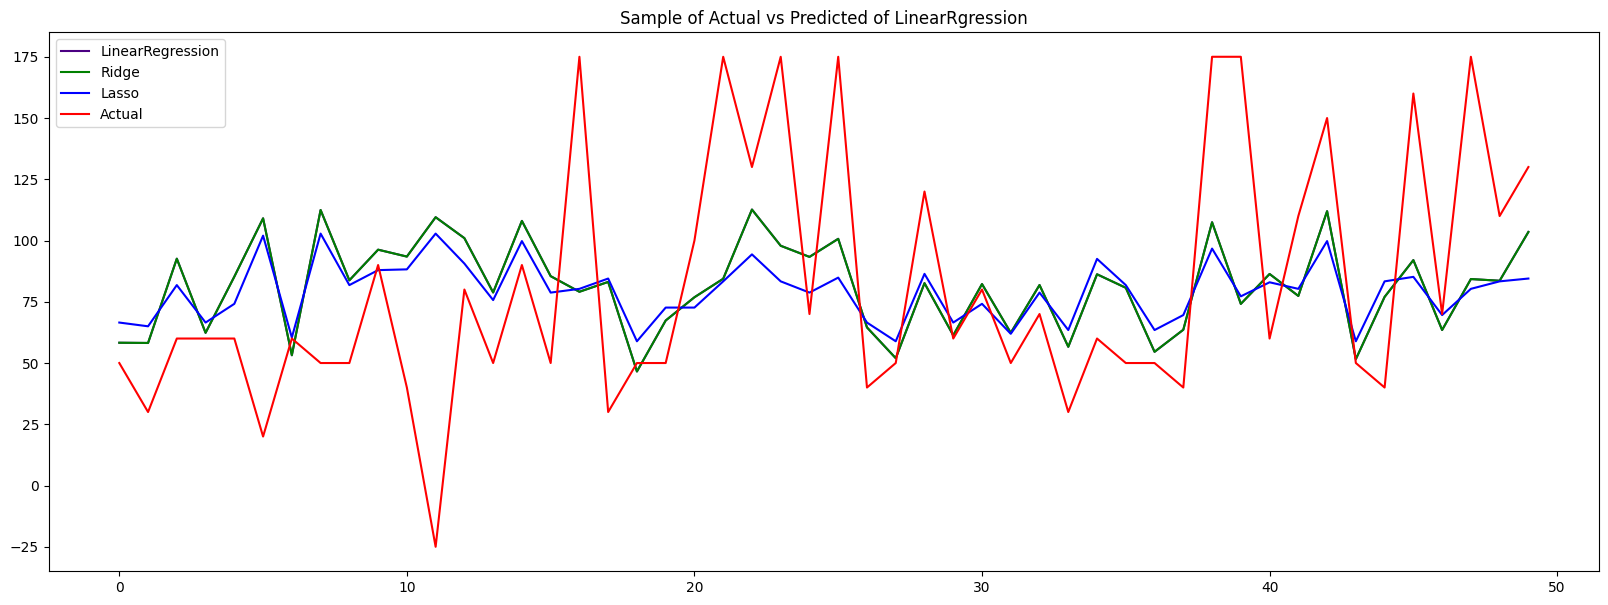

In [83]:
# Visualizing evaluation Metric Score chart
## Plot the predicted vs actual values
plt.figure(figsize=(20,7))
plt.plot(((y_pred_lr)[500:550]),color='indigo')
plt.plot(((y_pred_r)[500:550]),color='green')
plt.plot(((y_pred_l)[500:550]),color='blue')
plt.plot((np.array((y_test)[500:550])),color='red')
plt.legend(["LinearRegression","Ridge","Lasso","Actual"])
plt.title("Sample of Actual vs Predicted of LinearRgression" )
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge_params = {'alpha': [0.001, 0.01,0.1,0.5, 1,2,5]}
lasso_params = {'alpha': [0.0001, 0.001,0.01, 0.1,0.2,0.5,1]}

# Create Ridge and Lasso regression objects
ridge = Ridge()
lasso = Lasso()

# Define the scoring method using 'make_scorer' with MAPE
mape_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# GridSearchCV for Ridge model using MAPE scoring
ridge_cv = GridSearchCV(ridge, param_grid=ridge_params, scoring=mape_scorer)

# GridSearchCV for Lasso model using MAPE scoring
lasso_cv = GridSearchCV(lasso, param_grid=lasso_params, scoring=mape_scorer)

# Fit the models using GridSearchCV
ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)
# Get the best hyperparameters and fit the models again using the best hyperparameters
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha']).fit(X_train_scaled, y_train)
lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha']).fit(X_train_scaled, y_train)

#predict the train data using the best models
y_train_ridge=ridge_best.predict(X_train_scaled)
y_train_lasso = lasso_best.predict(X_train_scaled)
# Predict  values for the test data using the best models
y_pred_ridge = ridge_best.predict(X_test_scaled)
y_pred_lasso = lasso_best.predict(X_test_scaled)

# Evaluate
mse_ridge_train = mean_squared_error(y_train, y_train_ridge)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge)
r2_ridge_train = r2_score(y_train, y_train_ridge)
r2_ridge_test = r2_score(y_test, y_pred_ridge)
mse_lasso_train = mean_squared_error(y_train, y_train_lasso)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso)
r2_lasso_train = r2_score(y_train, y_train_lasso)
r2_lasso_test = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics for both models
print("Ridge Regression - Best Alpha:" , ridge_cv.best_params_['alpha'])
print("Ridge Mean Squared Error:",(mse_ridge_test))
print("Ridge R^2 Score:",(r2_ridge_test))
mse_percent_ridge = mse_ridge_test * 100
r2_percent_ridge = r2_ridge_test * 100
print("Ridge - Mean Squared Error: {:.2f}%".format(mse_percent_ridge))
print("Ridge - R-squared: {:.2f}%".format(r2_percent_ridge))

print("\nLasso Regression - Best Alpha:",lasso_cv.best_params_['alpha'])
print("Lasso Mean Squared Error:",(mse_lasso_test))
print("Lasso R^2 Score:",(r2_lasso_test))

mse_percent_lasso = mse_lasso_test * 100
r2_percent_lasso = r2_lasso_test * 100
print("Lasso - Mean Squared Error: {:.2f}%".format(mse_percent_lasso))
print("Lasso - R-squared: {:.2f}%".format(r2_percent_lasso))

Ridge Regression - Best Alpha: 5
Ridge Mean Squared Error: 1813.2368741970433
Ridge R^2 Score: 0.14654415371402285
Ridge - Mean Squared Error: 181323.69%
Ridge - R-squared: 14.65%

Lasso Regression - Best Alpha: 0.001
Lasso Mean Squared Error: 1813.4001915230538
Lasso R^2 Score: 0.14646728337862058
Lasso - Mean Squared Error: 181340.02%
Lasso - R-squared: 14.65%


create a list of metric score of linear regression

In [ ]:
list_lr=['LinearRegression',mse_lr_train, mse_lr_test, r2_lr_train, r2_lr_test]
#create a empty dataframe for metric score columns
score = pd.DataFrame(columns = ['Model' , 'Train MSE', 'Test MSE' , 'Train R2_Score', 'Test R2_Score'])
#add the rows to the dataframe of linearrgression
score.loc[len(score)]=list_lr
#create a list of ridge metric score after hyperparameter tuning
list_ridge=['Ridge',mse_ridge_train,mse_ridge_test,r2_ridge_train,r2_ridge_test]
#add the rows to the dataframe
score.loc[len(score)]=list_ridge
#create a list of lasso metric score after hyperparameter tuning
list_lasso=['Lasso',mse_lasso_train,mse_lasso_test,r2_lasso_train,r2_lasso_test]
#add the rows to the dataframe
score.loc[len(score)]=list_lasso
print(score)

              Model    Train MSE     Test MSE  Train R2_Score  Test R2_Score
0  LinearRegression  1843.643322  1813.379204        0.149824       0.146477
1             Ridge  1843.653201  1813.236874        0.149819       0.146544
2             Lasso  1843.643761  1813.400192        0.149823       0.146467


##### Which hyperparameter optimization technique have you used and why?

In this code, the GridSearchCV hyperparameter optimisation technique was employed. GridSearchCV was chosen because it thoroughly searches through a specific hyperparameter space to discover the ideal hyperparameters that would result in the greatest model performance. It is a frequently used method for hyperparameter optimisation that assures that the optimal hyperparameters are identified within the defined parameter space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes

### ML Model - 2. Decision Tree Regression

In [ ]:
# define the decision tree model
model = DecisionTreeRegressor(random_state=42)

#fit the model
model.fit(X_train_scaled, y_train)

#predictions on the test set
y_pred = model.predict(X_test_scaled)

#evaluate the model
mse_DT = mean_squared_error(y_test, y_pred)
r2_DT = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse_DT)
print("R-squared: ", r2_DT)

Mean Squared Error:  1883.0741436637081
R-squared:  0.11367308939631293


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

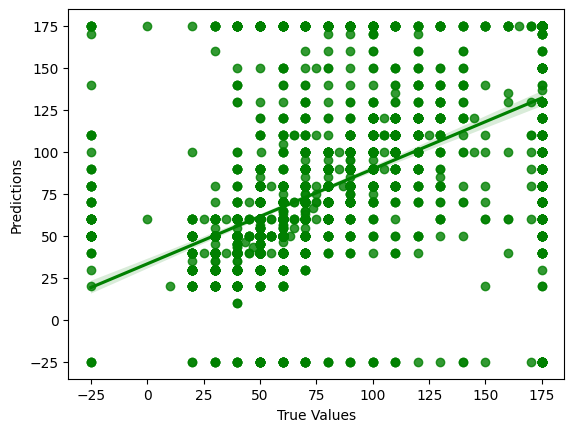

In [87]:
# Visualizing evaluation Metric Score chart

sns.regplot(x=y_test, y=y_pred, color='green')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [88]:
 #ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#hyperparameter
h_param= {'max_depth': [None, 15, 20, 25],
              'min_samples_split': [20, 25, 30],
              'min_samples_leaf': [4, 8, 12]}

#grid search cv
grid_search = GridSearchCV(model, h_param, cv=5, scoring=mape_scorer)
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

dt_best = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_split=grid_search.best_params_['min_samples_split'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                    random_state=0)

# Fit the Algorithm
dt_best.fit(X_train_scaled, y_train)

#predict on the training model
dtr_train=dt_best.predict(X_train_scaled)

# Predict on the model
y_pred = dt_best.predict(X_test_scaled)
#evaluate the model
mse_dsT_train=mean_squared_error(y_train,dtr_train)
mse_dsT_test = mean_squared_error(y_test, y_pred)
r2_dsT_train = r2_score(y_train, dtr_train)
r2_dsT_test = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse_dsT_test)
print("R-squared: ", r2_dsT_test)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 12, 'min_samples_split': 30}
Mean Squared Error:  1285.0109320276092
R-squared:  0.39516998132634606


In [89]:
#create a list of decion tree regressor metric  score
dtr_list=['DecisionTree',mse_dsT_train,mse_dsT_test,r2_dsT_train,r2_dsT_test]
#add the rows by list
score.loc[len(score)]=dtr_list
score

Model    Train MSE     Test MSE  Train R2_Score  Test R2_Score
0  LinearRegression  1843.643322  1813.379204        0.149824       0.146477
1             Ridge  1843.653201  1813.236874        0.149819       0.146544
2             Lasso  1843.643761  1813.400192        0.149823       0.146467
3      DecisionTree   861.375441  1285.010932        0.602786       0.395170

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. Check the metrix score chart.


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3. Random Forest Regression

In [90]:
# ML Model - 3 Implementation
rf = RandomForestRegressor(random_state=42)

# Fit the Algorithm
rf.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = rf.predict(X_test_scaled)

#evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_rf)
print("R-squared: ", r2_rf)

Mean squared error:  974.0814070758408
R-squared:  0.5415185498058614


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

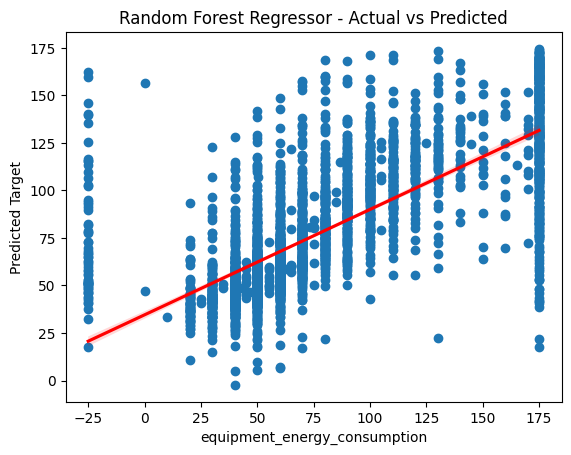

In [91]:
# Visualizing evaluation Metric Score chart
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Random Forest Regressor - Actual vs Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [92]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = { 'n_estimators': [100, 120, 150],
              'max_depth': [None, 1,2,3],
               'min_samples_leaf': [1, 2, 5],
               'max_features': ['auto', 'sqrt'],
               'bootstrap': [True, False] }

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring=mape_scorer)
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

# Fit the Algorithm
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

#Predict the train model
rf_train=best_rf_model.predict(X_train_scaled)

# Predict on the model
y_pred = best_rf_model.predict(X_test_scaled)

#evaluate the metric score
mse_rf_train = mean_squared_error(y_train, rf_train)
mse_rf_test = mean_squared_error(y_test, y_pred)
r2_rf_train = r2_score(y_train, rf_train)
r2_rf_test = r2_score(y_test, y_pred)


print('Mean Squared Error:', mse_rf_test)
print('R2 Score:', r2_rf_test)



Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 150}
Mean Squared Error: 917.0579886513485
R2 Score: 0.568358380013454


In [93]:
#create a list of random forest regressor metric  score
rf_list=['Randomforrest',mse_rf_train,mse_rf_test,r2_rf_train,r2_rf_test]
#add the rows by list
score.loc[len(score)]=rf_list
score

Model    Train MSE     Test MSE  Train R2_Score  Test R2_Score
0  LinearRegression  1843.643322  1813.379204        0.149824       0.146477
1             Ridge  1843.653201  1813.236874        0.149819       0.146544
2             Lasso  1843.643761  1813.400192        0.149823       0.146467
3      DecisionTree   861.375441  1285.010932        0.602786       0.395170
4     Randomforrest   110.733126   917.057989        0.948937       0.568358

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Yes. Check the metrix score chart.


### ML Model - 4. Extra Tree Regression

In [94]:
# Visualizing evaluation Metric Score chart
# ML Model - 4 Implementation
# define the decision tree model
model = ExtraTreesRegressor(random_state=42)

#fit the model
model.fit(X_train_scaled, y_train)

#predictions on the test set
y_pred = model.predict(X_test_scaled)

#evaluate the model
mse_br = mean_squared_error(y_test, y_pred)
r2_br = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse_br)
print("R-squared: ", r2_br)

Mean Squared Error:  1057.7750414325221
R-squared:  0.5021255600894674


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

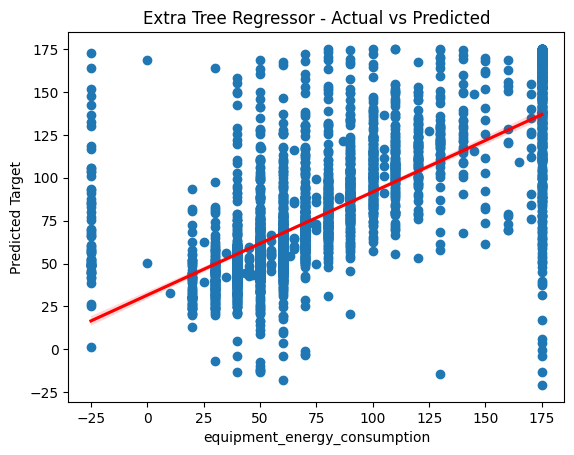

In [95]:
# Visualizing evaluation Metric Score chart
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Extra Tree Regressor - Actual vs Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
 #ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#hyperparameter
h_param= { 'bootstrap': [True, False],
                          'max_depth': [70,100, None],
                          'criterion' :['squared_error'],
                          'max_features': ['log2', 'sqrt'],
                          'n_estimators': [10,1400,100]}

#grid search cv
grid_search = GridSearchCV(model, h_param, cv=5, scoring=mape_scorer)
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

br_best = grid_search.best_estimator_

# Fit the Algorithm
br_best.fit(X_train_scaled, y_train)

#predict on the training model
br_train=dt_best.predict(X_train_scaled)

# Predict on the model
y_pred = br_best.predict(X_test_scaled)
#evaluate the model
mse_br_train=mean_squared_error(y_train,br_train)
mse_br_test = mean_squared_error(y_test, y_pred)
r2_br_train = r2_score(y_train, br_train)
r2_br_test = r2_score(y_test, y_pred)

print("Mean Absolute Percentage Error: ", mse_br_test)
print("R-squared: ", r2_br_test)

Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 70, 'max_features': 'log2', 'n_estimators': 1400}
Mean Absolute Percentage Error:  950.6269830389047
R-squared:  0.5525580976997118


In [97]:
#create a list of extra tree regressor metric  score
br_list=['ExtraTreeRegressor',mse_br_train,mse_br_test,r2_br_train,r2_br_test]
#add the rows by list
score.loc[len(score)]=br_list
score

Model    Train MSE     Test MSE  Train R2_Score  Test R2_Score
0    LinearRegression  1843.643322  1813.379204        0.149824       0.146477
1               Ridge  1843.653201  1813.236874        0.149819       0.146544
2               Lasso  1843.643761  1813.400192        0.149823       0.146467
3        DecisionTree   861.375441  1285.010932        0.602786       0.395170
4       Randomforrest   110.733126   917.057989        0.948937       0.568358
5  ExtraTreeRegressor   861.375441   950.626983        0.602786       0.552558

### ML Model - 5. XGB Regression

In [98]:
# ML Model - 5 Implementation
xgb = XGBRegressor()

# Fit the Algorithm
xgb.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = xgb.predict(X_test_scaled)

#evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse_xgb)
print("R-squared: ", r2_xgb)

Mean Squared Error:  1078.3098292596037
R-squared:  0.49246022900522846


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

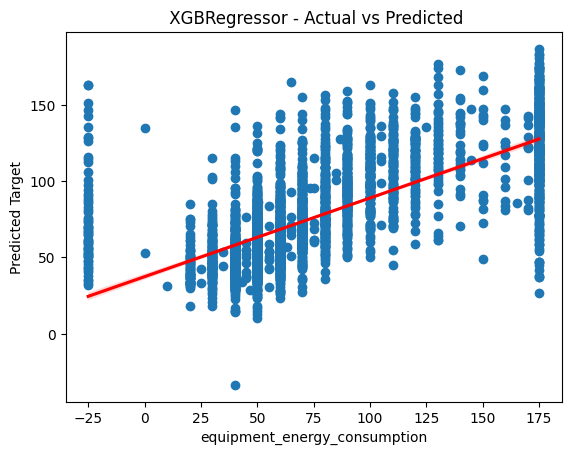

In [99]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title(' XGBRegressor - Actual vs Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [100]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {
    'n_estimators': [200,400, 600, 800],
    'max_depth': [10, 15, 20],
    'learning_rate': [ 0.3, 0.5, 0.7],
    'subsample': [1, 2, 4],
    'colsample_bytree': [1, 5, 10]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring=mape_scorer)
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

# Fit the Algorithm
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train_scaled, y_train)

#Predict the train model
xgb_train=best_xgb_model.predict(X_train_scaled)

# Predict on the model
y_pred = best_xgb_model.predict(X_test_scaled)

#evaluate the metric score
mse_xgb_train = mean_squared_error(y_train, xgb_train)
mse_xgb_test = mean_squared_error(y_test, y_pred)
r2_xgb_train = r2_score(y_train, xgb_train)
r2_xgb_test = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse_xgb_test)
print('R2 Score:', r2_xgb_test)


Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1}
Mean Squared Error: 1086.5882181781733
R2 Score: 0.4885637499952752


In [101]:
#create a list of  xgbregressor metric  score
xgb_list=['XGBRegressor',mse_xgb_train,mse_xgb_test,r2_xgb_train,r2_xgb_test]
#add the rows by list
score.loc[len(score)]=xgb_list
score

Model    Train MSE     Test MSE  Train R2_Score  Test R2_Score
0    LinearRegression  1843.643322  1813.379204        0.149824       0.146477
1               Ridge  1843.653201  1813.236874        0.149819       0.146544
2               Lasso  1843.643761  1813.400192        0.149823       0.146467
3        DecisionTree   861.375441  1285.010932        0.602786       0.395170
4       Randomforrest   110.733126   917.057989        0.948937       0.568358
5  ExtraTreeRegressor   861.375441   950.626983        0.602786       0.552558
6        XGBRegressor     3.868337  1086.588218        0.998216       0.488564

##ML_Model-6. LGBM Regressor

In [102]:
# ML Model - 6 Implementation
lgbm = LGBMRegressor(random_state=0)

# Fit the Algorithm
lgbm.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = lgbm.predict(X_test_scaled)

#evaluate the model
mse_lgbm = mean_squared_error(y_test, y_pred)
r2_lgbm = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse_lgbm)
print("R-squared: ", r2_lgbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1697
[LightGBM] [Info] Number of data points in the train set: 13431, number of used features: 11
[LightGBM] [Info] Start training from score 77.540717
Mean Squared Error:  1096.0301997501278
R-squared:  0.4841195902234431


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

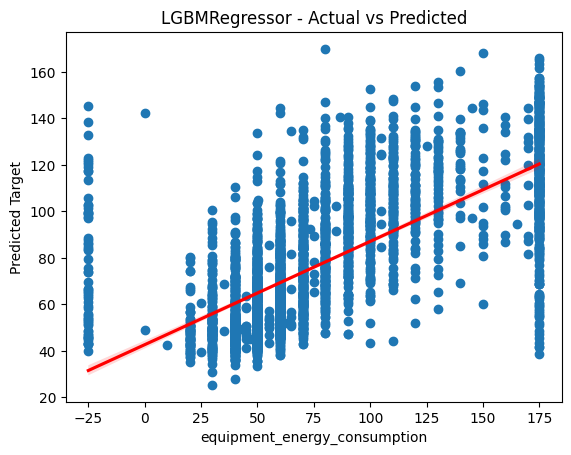

In [103]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('LGBMRegressor - Actual vs Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = param_grid = { 'learning_rate': [0.1],
                           'n_estimators': [50],
                            'max_depth': [8],
                            'colsample_bytree': [0.8],
                            'subsample': [0.8],
                            'min_child_samples': [5] }

grid_search = GridSearchCV(lgbm, param_grid, cv=5, scoring=mape_scorer)
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

# Fit the Algorithm
best_lgbm_model = grid_search.best_estimator_
best_lgbm_model.fit(X_train_scaled, y_train)

#Predict the train model
lgbm_train=best_lgbm_model.predict(X_train_scaled)

# Predict on the model
y_pred = best_lgbm_model.predict(X_test_scaled)

#evaluate the metric score
mse_lgbm_train = mean_squared_error(y_train, lgbm_train)
mse_lgbm_test = mean_squared_error(y_test, y_pred)
r2_lgbm_train = r2_score(y_train, lgbm_train)
r2_lgbm_test = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse_lgbm_test)
print('R2 Score:', r2_lgbm_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1686
[LightGBM] [Info] Number of data points in the train set: 10744, number of used features: 11
[LightGBM] [Info] Start training from score 77.842304
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1687
[LightGBM] [Info] Number of data points in the train set: 10745, number of used features: 11
[LightGBM] [Info] Start training from score 76.828913
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1683
[LightGBM] [Info] Number of data points in the train set: 10745, number of used features: 11
[LightGBM] [Info] Start t

In [105]:
#create a list of lgbmregressor metric  score
lgbm_list=['LGBMRegressor',mse_lgbm_train,mse_lgbm_test,r2_lgbm_train,r2_lgbm_test]
#add the rows by list
score.loc[len(score)]=lgbm_list
score

Model    Train MSE     Test MSE  Train R2_Score  Test R2_Score
0    LinearRegression  1843.643322  1813.379204        0.149824       0.146477
1               Ridge  1843.653201  1813.236874        0.149819       0.146544
2               Lasso  1843.643761  1813.400192        0.149823       0.146467
3        DecisionTree   861.375441  1285.010932        0.602786       0.395170
4       Randomforrest   110.733126   917.057989        0.948937       0.568358
5  ExtraTreeRegressor   861.375441   950.626983        0.602786       0.552558
6        XGBRegressor     3.868337  1086.588218        0.998216       0.488564
7       LGBMRegressor  1057.853551  1193.980546        0.512182       0.438016

### ML_Model-7. Stacking Regressor

In [106]:
# ML Model - 7 Implementation
estimators = [
     ('xgb', XGBRegressor()),
    ('etr', ExtraTreesRegressor()),
    ('random',RandomForestRegressor())
 ]
sr =StackingRegressor(estimators=estimators,
    final_estimator=ExtraTreesRegressor(n_estimators=1400,
                                          random_state=42),cv=5)
# Fit the Algorithm
sr.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = sr.predict(X_test_scaled)
#Predict the train model
sr_train=sr.predict(X_train_scaled)


#evaluate the model
mse_sr_train = mean_squared_error(y_train, sr_train)
mse_sr = mean_squared_error(y_test, y_pred)
r2_sr_train = r2_score(y_train, sr_train)
r2_sr = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse_sr)
print("R-squared: ", r2_sr)

Mean Squared Error:  1070.8853893209593
R-squared:  0.49595477059612847


####  Explain the ML Model used and it's performance using Evaluation metric Score Chart.

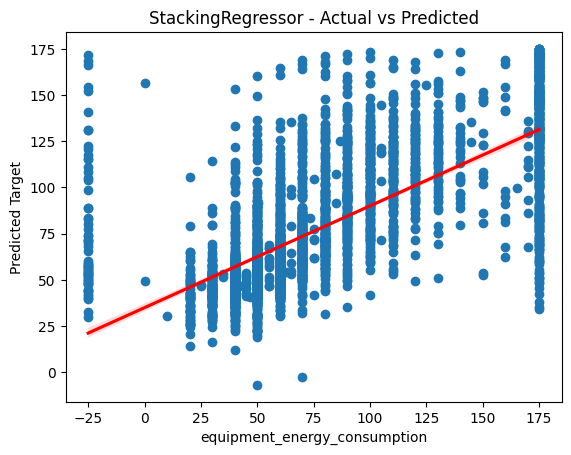

In [107]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('StackingRegressor - Actual vs Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

In [108]:


#create a list of stacking regressor metric  score
sr_list=['StackingRegressor',mse_sr_train,mse_sr,r2_sr_train,r2_sr]
#add the rows by list
score.loc[len(score)]=sr_list
score

Model    Train MSE     Test MSE  Train R2_Score  Test R2_Score
0    LinearRegression  1843.643322  1813.379204        0.149824       0.146477
1               Ridge  1843.653201  1813.236874        0.149819       0.146544
2               Lasso  1843.643761  1813.400192        0.149823       0.146467
3        DecisionTree   861.375441  1285.010932        0.602786       0.395170
4       Randomforrest   110.733126   917.057989        0.948937       0.568358
5  ExtraTreeRegressor   861.375441   950.626983        0.602786       0.552558
6        XGBRegressor     3.868337  1086.588218        0.998216       0.488564
7       LGBMRegressor  1057.853551  1193.980546        0.512182       0.438016
8   StackingRegressor   578.749358  1070.885389        0.733116       0.495955

# Final Result

### Best Model:
#### RandomForestRegressor 

* Test MSE = 917.06 (lowest among models with good generalization)

* Test R² Score = 0.568 (highest among all models)

* It generalizes well without overfitting (Train R² = 0.9489, not too far from Test R²).

### Worst Model:
#### LinearRegression / Ridge / Lasso

* Test R² Score ~ 0.146

* Test MSE ~ 1813, which is quite high

* These models perform poorly and barely explain the variance in the data.

### Special Notes:
* XGBRegressor has an extremely low Train MSE (3.86) and very high Train R² (0.998), but Test R² drops to 0.49 → this is a sign of overfitting.

* StackingRegressor performs decently but not better than RandomForest.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

<Axes: title={'center': 'R2 Score Results'}, xlabel='Model'>

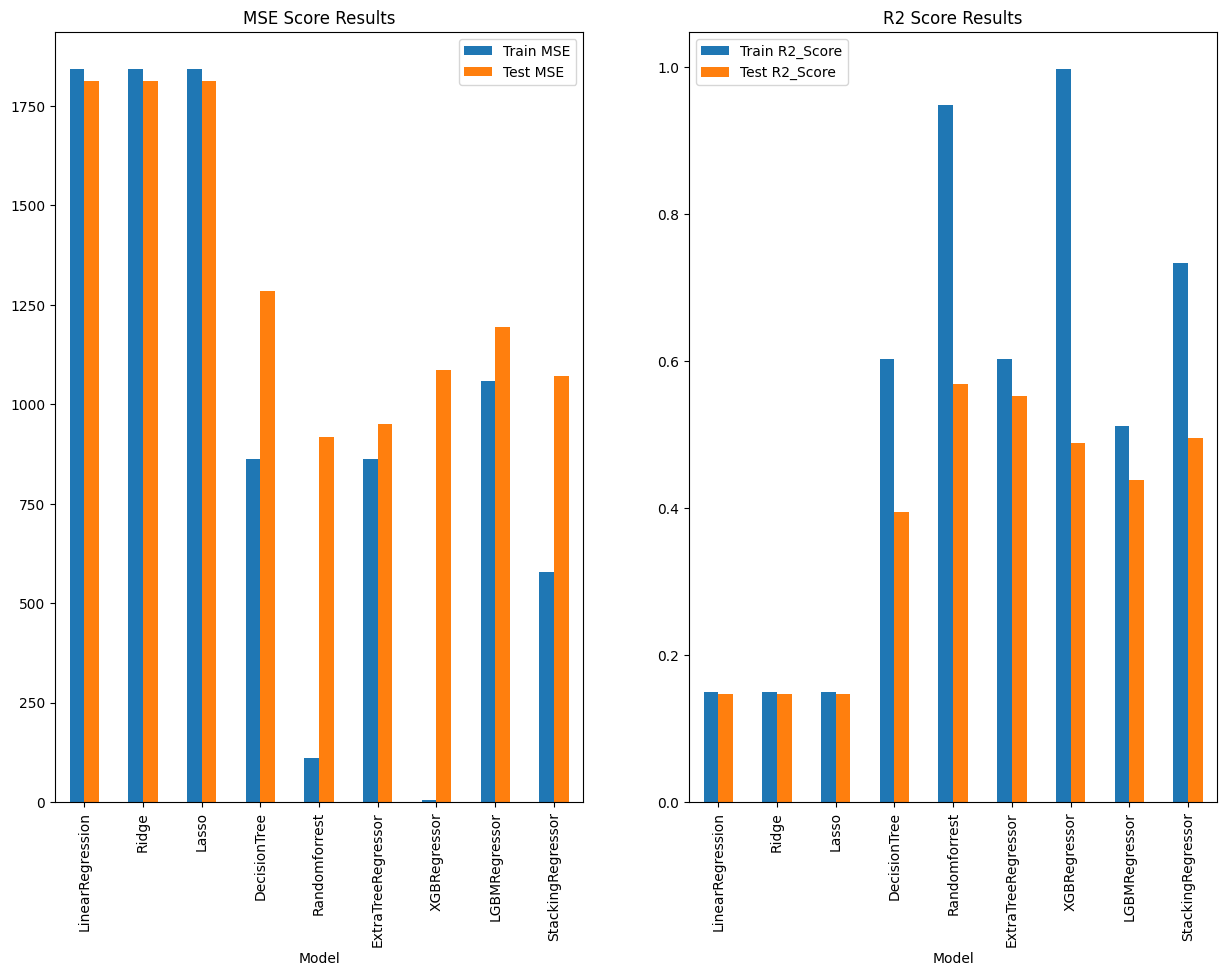

In [109]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
#plot the mse of all model
score.plot(x="Model", y=['Train MSE' , 'Test MSE'], kind="bar" , title = 'MSE Score Results',ax=ax[0])
#plot the r2_score of all model
score.plot(x="Model", y=['Train R2_Score' , 'Test R2_Score'], kind="bar" , title = 'R2 Score Results',ax=ax[1])

In [110]:
#install ELI5
! pip install eli5

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl.metadata (4.1 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl (15 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)

   ---------------------------------------- 0/6 [tabulate]
   ---------------------------------------- 0/6 [tabulate]
   ------ --------------------------------- 1/6 [MarkupSafe]
   ------ --------------------------------- 1/6 [MarkupSafe]
   ------------- -------------------------- 2/6 [graphviz]
   ------------- -------------------------- 2/6 [graphviz]
   ------------- -------------------------- 2/6 [graphviz]
   ------------- -------------------------- 2/6 [graphviz]
   ------------- -------------------------- 2/6 [graphviz]
   ------------- ----------

In [111]:
#import eli5
import eli5 as eli
#explain the weights
eli.explain_weights(br_best,feature_names = list(X.columns))

Explanation(estimator="ExtraTreesRegressor(bootstrap=True, max_depth=70, max_features='log2',\n                    n_estimators=1400, random_state=42)", description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=True, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='hour', weight=np.float64(0.2205769003854143), std=np.float64(0.03294489620531361), value=None), FeatureWeight(feature='zone6_temperature', weight=np.float64(0.0882561519687999), std=np.float64(0.011198627237164659), value=None), FeatureWeight(feature='zone4_temperature', weight=np.float64(0.08788518474719738), std=np.float64(0.008333110371318956), value=None), FeatureWeight(feature='dew_point', weight=np.float64(0.0870125761511355), std=np.float64(0.007552388050127328), value=None), FeatureWeight(feature='outdoor_temperature', weight=np.float64(0.08579061857290889), std=np.float64(0.010011832058157994), value=None), FeatureWeight(feature='zone4_humidity', weight=np.float64(0.08540750868373599), std=np.float64(0.007727211845867808), value=None), FeatureWeight(feature='zone6_humidity', weight=np.float64(0.08433844707555906), std=np.float64(0.01035032732772851), value=None), FeatureWeight(feature='wind_speed', weight=np.float64(0.07815731385964404), std=np.float64(0.007536174479619025), value=None), FeatureWeight(feature='lighting_energy', weight=np.float64(0.06850841784237818), std=np.float64(0.013432190415127132), value=None), FeatureWeight(feature='weekday', weight=np.float64(0.06470491788474904), std=np.float64(0.008991032188549936), value=None), FeatureWeight(feature='month', weight=np.float64(0.04936196282847771), std=np.float64(0.008189906642179303), value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

From the above figure, we can conclude that the zone4 and zone6 tempreture is most important for the prediction of equipment_energy_consumption,  the least imporatnt feature is month.

# **Conclusion**

### Model Comparison 

* RandomForestRegressor emerged as the best-performing model, achieving the highest Test R² Score of 0.568 and relatively low Test MSE of 917.06. It strikes a good balance between bias and variance, indicating strong generalization capability on unseen data.

* Linear Regression, Ridge, and Lasso performed the worst, with Test R² Scores around 0.146 and high Test MSE values (~1813). These models fail to capture the complexity in the dataset and provide poor predictive performance.

* XGBRegressor achieved an almost perfect training score (Train R² = 0.998), but its performance dropped on the test set (Test R² = 0.489), indicating overfitting.

* The Stacking Regressor offered decent performance (Test R² = 0.495), but not better than the RandomForest.


### Final Conclusion: 
* For this regression problem, RandomForestRegressor is the most suitable choice based on its overall performance and generalization ability.

### Save the Best Model (RandomForestRegressor)

In [ ]:
import pickle


with open('best_model_random_forest.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)


In [116]:
# Load the model from disk
with open('best_model_random_forest.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use it for prediction
y_pred = loaded_model.predict(X_test)


In [117]:
y_pred

array([77.04      , 73.10833333, 82.61      , ..., 74.47222222,
       73.10833333, 87.35833333], shape=(3358,))

# Task Completed